# Telecom Churn Case Study

###### Main Objective of this case study:


The main goal of the case study is to build ML models to predict churn. The predictive model that we’re going to build will be the following purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be our primary evaluation metric, we should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn.

Recommend strategies to manage customer churn based on our observations.

In [2]:
#Lets import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random

# Let us import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

# Data Understanding, Preparation, and Pre-Processing

In [3]:
df_tel=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [4]:
df_test.id

0        69999
1        70000
2        70001
3        70002
4        70003
         ...  
29995    99994
29996    99995
29997    99996
29998    99997
29999    99998
Name: id, Length: 30000, dtype: int64

In [5]:
df_tel.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [6]:
df_tel.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [7]:
df_tel.shape

(69999, 172)

In [8]:
df_tel.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [9]:
df_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [10]:
df_test.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  30000.000000    30000.0         29684.0         29684.0   
mean   84998.500000      109.0             0.0             0.0   
std     8660.398374        0.0             0.0             0.0   
min    69999.000000      109.0             0.0             0.0   
25%    77498.750000      109.0             0.0             0.0   
50%    84998.500000      109.0             0.0             0.0   
75%    92498.250000      109.0             0.0             0.0   
max    99998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29684.0  30000.000000  30000.000000  30000.000000  28831.000000   
mean              0.0    282.644348    279.355021    279.845167    130.629693   
std               0.0    314.560212    323.205370    326.437029    290.677420   
min               0.0   -185.043000  -2014.045000   -146.859000      0.000000   
25%               0.0     92.907500     87.504750     84.180500      7.280000   
50%               0.0    198.227500    191.775000    191.690500     34.760000   
75%               0.0    371.969250    365.250750    367.804750    117.170000   
max               0.0  10955.066000  13224.119000  13505.996000   6944.360000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  28828.000000  28325.000000  28831.000000  28828.000000  28325.000000   
mean     133.148632    133.111348    195.745473    196.792375    196.647889   
std      302.921820    301.951806    316.923836    333.628481    334.277643   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.540000     34.385000     32.110000     31.740000   
50%       32.550000     33.060000     95.830000     91.435000     92.810000   
75%      115.210000    117.730000    229.230000    224.972500    225.760000   
max     7411.010000   6723.790000   6962.460000   9667.130000  13547.840000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   28831.000000   28828.000000   28325.000000   28831.000000   
mean       10.380431       7.465889       7.967267      13.269785   
std        99.973352     103.337675      94.622596      66.475975   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13724.380000   15371.040000   13095.360000    2165.440000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   28828.000000   28325.000000      28831.000000      28828.000000   
mean        9.763957      10.440251         47.557601         47.188688   
std        58.325466      64.933372        150.588656        156.664295   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.650000          1.580000   
50%         0.000000       0.000000         11.930000         11.680000   
75%         0.000000       0.000000         41.410000         40.190000   
max      1878.860000    2860.510000       5878.530000       7163.210000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      28325.000000      28831.000000      28828.000000      28325.000000   
mean          46.359887         93.584273         92.793180         93.238288   
std          145.087354        164.481651        165.674188        164.516683   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.580000          9.770000          9.890000          9.740000   
50%           11.690000         41.010000         41.060000         40.440000   
75%           40.490000        110.330000        107.645000        108.680000   
max         6723.790000       4729

In [11]:
#Let us create a function to calculate the the percentage missing values in a dataframe
def missing_run(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
    pd.set_option('display.max_rows', 200)
    return missing_value_df

In [12]:
missing_run(df_tel)

column_name  percent_missing
arpu_3g_6                                arpu_3g_6        74.902499
count_rech_2g_6                    count_rech_2g_6        74.902499
night_pck_user_6                  night_pck_user_6        74.902499
arpu_2g_6                                arpu_2g_6        74.902499
date_of_last_rech_data_6  date_of_last_rech_data_6        74.902499
total_rech_data_6                total_rech_data_6        74.902499
av_rech_amt_data_6              av_rech_amt_data_6        74.902499
max_rech_data_6                    max_rech_data_6        74.902499
count_rech_3g_6                    count_rech_3g_6        74.902499
fb_user_6                                fb_user_6        74.902499
night_pck_user_7                  night_pck_user_7        74.478207
date_of_last_rech_data_7  date_of_last_rech_data_7        74.478207
total_rech_data_7                total_rech_data_7        74.478207
max_rech_data_7                    max_rech_data_7        74.478207
fb_user_7                                fb_user_7        74.478207
count_rech_2g_7                    count_rech_2g_7        74.478207
count_rech_3g_7                    count_rech_3g_7        74.478207
arpu_3g_7                                arpu_3g_7        74.478207
av_rech_amt_data_7              av_rech_amt_data_7        74.478207
arpu_2g_7                                arpu_2g_7        74.478207
count_rech_2g_8                    count_rech_2g_8        73.689624
av_rech_amt_data_8              av_rech_amt_data_8        73.689624
night_pck_user_8                  night_pck_user_8        73.689624
max_rech_data_8                    max_rech_data_8        73.689624
total_rech_data_8                total_rech_data_8        73.689624
arpu_2g_8                                arpu_2g_8        73.689624
arpu_3g_8                                arpu_3g_8        73.689624
date_of_last_rech_data_8  date_of_last_rech_data_8        73.689624
fb_user_8                                fb_user_8        73.689624
count_rech_3g_8                    count_rech_3g_8        73.689624
isd_og_mou_8                          isd_og_mou_8         5.290076
std_ic_t2o_mou_8                  std_ic_t2o_mou_8         5.290076
std_og_t2c_mou_8                  std_og_t2c_mou_8         5.290076
std_ic_t2f_mou_8                  std_ic_t2f_mou_8         5.290076
std_og_mou_8                          std_og_mou_8         5.290076
std_ic_t2m_mou_8                  std_ic_t2m_mou_8         5.290076
std_ic_mou_8                          std_ic_mou_8         5.290076
std_ic_t2t_mou_8                  std_ic_t2t_mou_8         5.290076
og_others_8                            og_others_8         5.290076
spl_og_mou_8                          spl_og_mou_8         5.290076
loc_ic_t2m_mou_8                  loc_ic_t2m_mou_8         5.290076
loc_ic_mou_8                          loc_ic_mou_8         5.290076
loc_ic_t2f_mou_8                  loc_ic_t2f_mou_8         5.290076
std_og_t2f_mou_8                  std_og_t2f_mou_8         5.290076
loc_og_t2c_mou_8                  loc_og_t2c_mou_8         5.290076
ic_others_8                            ic_others_8         5.290076
loc_og_mou_8                          loc_og_mou_8         5.290076
onnet_mou_8                            onnet_mou_8         5.290076
offnet_mou_8                          offnet_mou_8         5.290076
roam_ic_mou_8                        roam_ic_mou_8         5.290076
roam_og_mou_8                        roam_og_mou_8         5.290076
loc_og_t2t_mou_8                  loc_og_t2t_mou_8         5.290076
loc_og_t2m_mou_8                  loc_og_t2m_mou_8         5.290076
loc_og_t2f_mou_8                  loc_og_t2f_mou_8         5.290076
std_og_t2m_mou_8                  std_og_t2m_mou_8         5.290076
loc_ic_t2t_mou_8                  loc_ic_t2t_mou_8         5.290076
isd_ic_mou_8                          isd_ic_mou_8         5.290076
std_og_t2t_mou_8                  std_og_t2t_mou_8         5.290076
spl_ic_mou_8               

In [13]:
null_cols = df_tel.isnull().sum()/len(df_tel.index)*100
null_cols

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [14]:
null_cols = null_cols[null_cols>0]
null_cols.sort_values(inplace=True, ascending=False)
null_cols

max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
count_rech_2g_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
count_rech_2g_7             74.478207
av_rech_amt_data_7          74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
date_of_last_rech_data_7    74.478207
night_pck_user_7            74.478207
fb_user_7                   74.478207
count_rech_3g_7             74.478207
total_rech_data_8           73.689624
max_rech_data_8             73.689624
date_of_last_rech_data_8    73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
arpu_3g_8                   73.689624
count_rech_3

In [15]:
cols_unique = df_tel.nunique()
print(cols_unique.sort_values(ascending=False))

id                          69999
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
total_og_mou_7              33195
total_og_mou_6              33135
total_og_mou_8              32897
total_ic_mou_6              27432
total_ic_mou_7              27418
total_ic_mou_8              27318
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
loc_ic_mou_6                24442
loc_ic_mou_7                24258
loc_ic_mou_8                24182
loc_og_mou_6                22309
std_og_mou_7                22088
loc_og_mou_7                22012
loc_og_mou_8                21950
std_og_mou_6                21837
std_og_mou_8                21745
onnet_mou_7                 20076
onnet_mou_6                 20057
onnet_mou_8                 19725
loc_ic_t2m_mou_6            19034
loc_ic_t2m_mou_8            19022
loc_ic_t2m_mou_7            18945
loc_og_t2m_mou_6            17848
loc_og_t2m_mou

In [16]:
#let us identify the single valued columns
cols_unique_with1_todrop = cols_unique.loc[cols_unique.values == 1]
cols_unique_with1_todrop.index

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [17]:
#df_tel.dropna(axis = 1, how = 'all', inplace = True)
#df_tel.shape

In [18]:
# Let us create a function to drop columns from both train and test set
def drop_col(col_name):
    df_tel.drop(col_name, axis=1, inplace=True)
    df_test.drop(col_name, axis=1, inplace=True)
    return(col_name)

In [19]:
df_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [20]:
#Save the ids of the individual rows for Kaggle submission later
final_id = df_test.id

In [21]:
#Let us drop the single values columns
drop_col(list(cols_unique_with1_todrop.index))

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [22]:
# Let's also drop the column 'id' which is not related to the customer behaviour 
drop_col('id')

'id'

In [23]:
df_tel.nunique().sort_values(0)

churn_probability               2
night_pck_user_8                2
night_pck_user_7                2
night_pck_user_6                2
fb_user_7                       2
fb_user_8                       2
fb_user_6                       2
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_6                   10
monthly_3g_8                   12
monthly_3g_7                   13
count_rech_3g_6                23
sachet_3g_6                    23
sachet_3g_7                    26
count_rech_3g_7                27
sachet_3g_8                    28
count_rech_3g_8                29
date_of_last_rech_6            30
count_rech_2g_6                30
sachet_2g_6                    30
date_of_last_rech_data_6       30
date_of_last_rech_8            31
date_of_last_rech_data_8       31
date_of_last_rech_7            31
date_of_last_rech_data_7       31
sachet_2g_8                    32
sachet_2g_7                    33
count_rech_2g_

In [24]:
df_tel.shape

(69999, 158)

In [25]:
# Lets look at the date fields 
date_cols=list(df_tel.select_dtypes(['object']).columns)
df_tel[date_cols]

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0               6/22/2014           7/10/2014           8/24/2014   
1               6/12/2014           7/10/2014           8/26/2014   
2               6/11/2014           7/22/2014           8/24/2014   
3               6/15/2014           7/21/2014           8/25/2014   
4               6/25/2014           7/26/2014           8/30/2014   
...                   ...                 ...                 ...   
69994           6/18/2014           7/31/2014           8/31/2014   
69995           6/28/2014           7/31/2014           8/27/2014   
69996           6/25/2014           7/30/2014           8/29/2014   
69997           6/29/2014           7/19/2014           8/26/2014   
69998           6/19/2014           7/27/2014           8/25/2014   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                          NaN                      NaN   
1                          NaN                 7/8/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                    6/25/2014                7/23/2014   
...                        ...                      ...   
69994                      NaN                7/31/2014   
69995                      NaN                      NaN   
69996                      NaN                      NaN   
69997                6/17/2014                7/13/2014   
69998                6/19/2014                      NaN   

      date_of_last_rech_data_8  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                    8/20/2014  
...                        ...  
69994                8/21/2014  
69995                      NaN  
69996                      NaN  
69997                8/14/2014  
69998                 8/8/2014  

[69999 rows x 6 columns]

In [26]:
# Let us drop all the date columns since they contain the date of the recharge and the relevant data is available in the recharge amount.
drop_col(date_cols)

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [27]:
# Lets look at the date fields 
date_cols=list(df_tel.select_dtypes(['object']).columns)
df_tel[date_cols]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[69999 rows x 0 columns]

In [28]:
#Lets check all the recharge related columns since these variables can be imputed with 0 for all null values
recharge_cols =  df_tel.columns[df_tel.columns.str.contains('rech')]
recharge_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

In [29]:
#For all the missing values in these columns lets fill with 0
for col_name in recharge_cols:
    df_tel[col_name]=df_tel[col_name].fillna(0)
    df_test[col_name]=df_test[col_name].fillna(0)

In [30]:
missing_run(df_tel)

column_name  percent_missing
arpu_2g_6                    arpu_2g_6        74.902499
arpu_3g_6                    arpu_3g_6        74.902499
night_pck_user_6      night_pck_user_6        74.902499
fb_user_6                    fb_user_6        74.902499
arpu_2g_7                    arpu_2g_7        74.478207
night_pck_user_7      night_pck_user_7        74.478207
arpu_3g_7                    arpu_3g_7        74.478207
fb_user_7                    fb_user_7        74.478207
fb_user_8                    fb_user_8        73.689624
arpu_2g_8                    arpu_2g_8        73.689624
night_pck_user_8      night_pck_user_8        73.689624
arpu_3g_8                    arpu_3g_8        73.689624
std_og_mou_8              std_og_mou_8         5.290076
std_og_t2f_mou_8      std_og_t2f_mou_8         5.290076
ic_others_8                ic_others_8         5.290076
isd_ic_mou_8              isd_ic_mou_8         5.290076
std_ic_mou_8              std_ic_mou_8         5.290076
std_ic_t2m_mou_8      std_ic_t2m_mou_8         5.290076
loc_ic_t2t_mou_8      loc_ic_t2t_mou_8         5.290076
isd_og_mou_8              isd_og_mou_8         5.290076
std_og_t2t_mou_8      std_og_t2t_mou_8         5.290076
og_others_8                og_others_8         5.290076
spl_ic_mou_8              spl_ic_mou_8         5.290076
loc_ic_t2m_mou_8      loc_ic_t2m_mou_8         5.290076
loc_og_mou_8              loc_og_mou_8         5.290076
std_og_t2m_mou_8      std_og_t2m_mou_8         5.290076
spl_og_mou_8              spl_og_mou_8         5.290076
roam_og_mou_8            roam_og_mou_8         5.290076
offnet_mou_8              offnet_mou_8         5.290076
loc_og_t2f_mou_8      loc_og_t2f_mou_8         5.290076
loc_ic_t2f_mou_8      loc_ic_t2f_mou_8         5.290076
loc_og_t2m_mou_8      loc_og_t2m_mou_8         5.290076
onnet_mou_8                onnet_mou_8         5.290076
std_ic_t2t_mou_8      std_ic_t2t_mou_8         5.290076
loc_og_t2t_mou_8      loc_og_t2t_mou_8         5.290076
std_ic_t2f_mou_8      std_ic_t2f_mou_8         5.290076
loc_og_t2c_mou_8      loc_og_t2c_mou_8         5.290076
loc_ic_mou_8              loc_ic_mou_8         5.290076
roam_ic_mou_8            roam_ic_mou_8         5.290076
std_ic_t2m_mou_6      std_ic_t2m_mou_6         3.954342
spl_ic_mou_6              spl_ic_mou_6         3.954342
loc_ic_t2f_mou_6      loc_ic_t2f_mou_6         3.954342
std_ic_t2t_mou_6      std_ic_t2t_mou_6         3.954342
loc_ic_t2t_mou_6      loc_ic_t2t_mou_6         3.954342
loc_ic_mou_6              loc_ic_mou_6         3.954342
loc_ic_t2m_mou_6      loc_ic_t2m_mou_6         3.954342
og_others_6                og_others_6         3.954342
std_ic_mou_6              std_ic_mou_6         3.954342
std_ic_t2f_mou_6      std_ic_t2f_mou_6         3.954342
loc_og_mou_6              loc_og_mou_6         3.954342
std_og_t2t_mou_6      std_og_t2t_mou_6         3.954342
roam_og_mou_6            roam_og_mou_6         3.954342
loc_og_t2t_mou_6      loc_og_t2t_mou_6         3.954342
loc_og_t2m_mou_6      loc_og_t2m_mou_6         3.954342
loc_og_t2f_mou_6      loc_og_t2f_mou_6         3.954342
loc_og_t2c_mou_6      loc_og_t2c_mou_6         3.954342
spl_og_mou_6              spl_og_mou_6         3.954342
offnet_mou_6              offnet_mou_6         3.954342
std_og_t2m_mou_6      std_og_t2m_mou_6         3.954342
ic_others_6                ic_others_6         3.954342
std_og_t2f_mou_6      std_og_t2f_mou_6         3.954342
std_og_mou_6              std_og_mou_6         3.954342
onnet_mou_6                onnet_mou_6         3.954342
isd_og_mou_6              isd_og_mou_6         3.954342
isd_ic_mou_6              isd_ic_mou_6         3.954342
roam_ic_mou_6            roam_ic_mou_6         3.954342
std_ic_t2f_mou_7      std_ic_t2f_mou_7         3.838626
spl_ic_mou_7              spl_ic_mou_7         3.838626
ic_others_7                ic_others_7         3.838626
isd_ic_mou_7              isd_ic_mou_7         3.838626
std_ic_mou_7              std_ic_mou_7         3.83

In [31]:
# Let us drop columns having more than 70 % null values
miss=missing_run(df_tel)
cols=list(miss[miss.percent_missing>70].index)
drop_col(list(miss[miss.percent_missing>70].index))
missing_run(df_tel)

column_name  percent_missing
std_og_t2m_mou_8      std_og_t2m_mou_8         5.290076
loc_og_mou_8              loc_og_mou_8         5.290076
loc_ic_mou_8              loc_ic_mou_8         5.290076
loc_og_t2c_mou_8      loc_og_t2c_mou_8         5.290076
std_og_mou_8              std_og_mou_8         5.290076
loc_og_t2f_mou_8      loc_og_t2f_mou_8         5.290076
loc_ic_t2f_mou_8      loc_ic_t2f_mou_8         5.290076
isd_og_mou_8              isd_og_mou_8         5.290076
loc_og_t2m_mou_8      loc_og_t2m_mou_8         5.290076
spl_ic_mou_8              spl_ic_mou_8         5.290076
std_ic_t2f_mou_8      std_ic_t2f_mou_8         5.290076
loc_og_t2t_mou_8      loc_og_t2t_mou_8         5.290076
std_ic_t2m_mou_8      std_ic_t2m_mou_8         5.290076
spl_og_mou_8              spl_og_mou_8         5.290076
roam_og_mou_8            roam_og_mou_8         5.290076
loc_ic_t2m_mou_8      loc_ic_t2m_mou_8         5.290076
std_og_t2t_mou_8      std_og_t2t_mou_8         5.290076
roam_ic_mou_8            roam_ic_mou_8         5.290076
isd_ic_mou_8              isd_ic_mou_8         5.290076
offnet_mou_8              offnet_mou_8         5.290076
og_others_8                og_others_8         5.290076
std_ic_t2t_mou_8      std_ic_t2t_mou_8         5.290076
onnet_mou_8                onnet_mou_8         5.290076
loc_ic_t2t_mou_8      loc_ic_t2t_mou_8         5.290076
std_og_t2f_mou_8      std_og_t2f_mou_8         5.290076
ic_others_8                ic_others_8         5.290076
std_ic_mou_8              std_ic_mou_8         5.290076
std_og_mou_6              std_og_mou_6         3.954342
loc_ic_t2m_mou_6      loc_ic_t2m_mou_6         3.954342
loc_ic_mou_6              loc_ic_mou_6         3.954342
isd_og_mou_6              isd_og_mou_6         3.954342
std_ic_t2f_mou_6      std_ic_t2f_mou_6         3.954342
og_others_6                og_others_6         3.954342
std_ic_t2m_mou_6      std_ic_t2m_mou_6         3.954342
std_ic_t2t_mou_6      std_ic_t2t_mou_6         3.954342
spl_og_mou_6              spl_og_mou_6         3.954342
loc_og_mou_6              loc_og_mou_6         3.954342
std_og_t2f_mou_6      std_og_t2f_mou_6         3.954342
std_ic_mou_6              std_ic_mou_6         3.954342
onnet_mou_6                onnet_mou_6         3.954342
loc_ic_t2f_mou_6      loc_ic_t2f_mou_6         3.954342
offnet_mou_6              offnet_mou_6         3.954342
ic_others_6                ic_others_6         3.954342
roam_ic_mou_6            roam_ic_mou_6         3.954342
roam_og_mou_6            roam_og_mou_6         3.954342
loc_og_t2t_mou_6      loc_og_t2t_mou_6         3.954342
isd_ic_mou_6              isd_ic_mou_6         3.954342
loc_og_t2m_mou_6      loc_og_t2m_mou_6         3.954342
loc_og_t2f_mou_6      loc_og_t2f_mou_6         3.954342
loc_og_t2c_mou_6      loc_og_t2c_mou_6         3.954342
spl_ic_mou_6              spl_ic_mou_6         3.954342
std_og_t2t_mou_6      std_og_t2t_mou_6         3.954342
std_og_t2m_mou_6      std_og_t2m_mou_6         3.954342
loc_ic_t2t_mou_6      loc_ic_t2t_mou_6         3.954342
loc_ic_mou_7              loc_ic_mou_7         3.838626
std_ic_t2m_mou_7      std_ic_t2m_mou_7         3.838626
std_ic_t2t_mou_7      std_ic_t2t_mou_7         3.838626
std_ic_t2f_mou_7      std_ic_t2f_mou_7         3.838626
spl_ic_mou_7              spl_ic_mou_7         3.838626
isd_ic_mou_7              isd_ic_mou_7         3.838626
ic_others_7                ic_others_7         3.838626
std_ic_mou_7              std_ic_mou_7         3.838626
loc_ic_t2t_mou_7      loc_ic_t2t_mou_7         3.838626
loc_ic_t2f_mou_7      loc_ic_t2f_mou_7         3.838626
std_og_t2m_mou_7      std_og_t2m_mou_7         3.838626
onnet_mou_7                onnet_mou_7         3.838626
offnet_mou_7              offnet_mou_7         3.838626
loc_ic_t2m_mou_7      loc_ic_t2m_mou_7         3.838626
roam_og_mou_7            roam_og_mou_7         3.838626
loc_og_t2t_mou_7      loc_og_t2t_mou_7         3.838626
loc_og_t2m_mou_7      loc_og_t2m_mou_7         3.83

In [32]:
cols_to_fill_with_median = missing_run(df_tel)
cols_to_fill_with_median = cols_to_fill_with_median[cols_to_fill_with_median.percent_missing>0]
cols_to_fill_with_median

column_name  percent_missing
std_og_t2m_mou_8  std_og_t2m_mou_8         5.290076
loc_og_mou_8          loc_og_mou_8         5.290076
loc_ic_mou_8          loc_ic_mou_8         5.290076
loc_og_t2c_mou_8  loc_og_t2c_mou_8         5.290076
std_og_mou_8          std_og_mou_8         5.290076
loc_og_t2f_mou_8  loc_og_t2f_mou_8         5.290076
loc_ic_t2f_mou_8  loc_ic_t2f_mou_8         5.290076
isd_og_mou_8          isd_og_mou_8         5.290076
loc_og_t2m_mou_8  loc_og_t2m_mou_8         5.290076
spl_ic_mou_8          spl_ic_mou_8         5.290076
std_ic_t2f_mou_8  std_ic_t2f_mou_8         5.290076
loc_og_t2t_mou_8  loc_og_t2t_mou_8         5.290076
std_ic_t2m_mou_8  std_ic_t2m_mou_8         5.290076
spl_og_mou_8          spl_og_mou_8         5.290076
roam_og_mou_8        roam_og_mou_8         5.290076
loc_ic_t2m_mou_8  loc_ic_t2m_mou_8         5.290076
std_og_t2t_mou_8  std_og_t2t_mou_8         5.290076
roam_ic_mou_8        roam_ic_mou_8         5.290076
isd_ic_mou_8          isd_ic_mou_8         5.290076
offnet_mou_8          offnet_mou_8         5.290076
og_others_8            og_others_8         5.290076
std_ic_t2t_mou_8  std_ic_t2t_mou_8         5.290076
onnet_mou_8            onnet_mou_8         5.290076
loc_ic_t2t_mou_8  loc_ic_t2t_mou_8         5.290076
std_og_t2f_mou_8  std_og_t2f_mou_8         5.290076
ic_others_8            ic_others_8         5.290076
std_ic_mou_8          std_ic_mou_8         5.290076
std_og_mou_6          std_og_mou_6         3.954342
loc_ic_t2m_mou_6  loc_ic_t2m_mou_6         3.954342
loc_ic_mou_6          loc_ic_mou_6         3.954342
isd_og_mou_6          isd_og_mou_6         3.954342
std_ic_t2f_mou_6  std_ic_t2f_mou_6         3.954342
og_others_6            og_others_6         3.954342
std_ic_t2m_mou_6  std_ic_t2m_mou_6         3.954342
std_ic_t2t_mou_6  std_ic_t2t_mou_6         3.954342
spl_og_mou_6          spl_og_mou_6         3.954342
loc_og_mou_6          loc_og_mou_6         3.954342
std_og_t2f_mou_6  std_og_t2f_mou_6         3.954342
std_ic_mou_6          std_ic_mou_6         3.954342
onnet_mou_6            onnet_mou_6         3.954342
loc_ic_t2f_mou_6  loc_ic_t2f_mou_6         3.954342
offnet_mou_6          offnet_mou_6         3.954342
ic_others_6            ic_others_6         3.954342
roam_ic_mou_6        roam_ic_mou_6         3.954342
roam_og_mou_6        roam_og_mou_6         3.954342
loc_og_t2t_mou_6  loc_og_t2t_mou_6         3.954342
isd_ic_mou_6          isd_ic_mou_6         3.954342
loc_og_t2m_mou_6  loc_og_t2m_mou_6         3.954342
loc_og_t2f_mou_6  loc_og_t2f_mou_6         3.954342
loc_og_t2c_mou_6  loc_og_t2c_mou_6         3.954342
spl_ic_mou_6          spl_ic_mou_6         3.954342
std_og_t2t_mou_6  std_og_t2t_mou_6         3.954342
std_og_t2m_mou_6  std_og_t2m_mou_6         3.954342
loc_ic_t2t_mou_6  loc_ic_t2t_mou_6         3.954342
loc_ic_mou_7          loc_ic_mou_7         3.838626
std_ic_t2m_mou_7  std_ic_t2m_mou_7         3.838626
std_ic_t2t_mou_7  std_ic_t2t_mou_7         3.838626
std_ic_t2f_mou_7  std_ic_t2f_mou_7         3.838626
spl_ic_mou_7          spl_ic_mou_7         3.838626
isd_ic_mou_7          isd_ic_mou_7         3.838626
ic_others_7            ic_others_7         3.838626
std_ic_mou_7          std_ic_mou_7         3.838626
loc_ic_t2t_mou_7  loc_ic_t2t_mou_7         3.838626
loc_ic_t2f_mou_7  loc_ic_t2f_mou_7         3.838626
std_og_t2m_mou_7  std_og_t2m_mou_7         3.838626
onnet_mou_7            onnet_mou_7         3.838626
offnet_mou_7          offnet_mou_7         3.838626
loc_ic_t2m_mou_7  loc_ic_t2m_mou_7         3.838626
roam_og_mou_7        roam_og_mou_7         3.838626
loc_og_t2t_mou_7  loc_og_t2t_mou_7         3.838626
loc_og_t2m_mou_7  loc_og_t2m_mou_7         3.838626
loc_og_t2f_mou_7  loc_og_t2f_mou_7         3.838626
loc_og_t2c_mou_7  loc_og_t2c_mou_7         3.838626
loc_og_mou_7          loc_og_mou_7         3.838626
std_og_t2t_mou_7  std_og_t2t_mou_7         3.838626
roam_ic_mou_7        roam_ic_mou_7         3.838626
std_og_t2f_mou_7  s

In [33]:
# Lets fill the columns with less than 10% missing values with the median values of their columns respectively 
for col_name in cols_to_fill_with_median.index:
    df_tel[col_name]=df_tel[col_name].fillna(df_tel[col_name].median())
    df_test[col_name]=df_test[col_name].fillna(df_test[col_name].median())

In [34]:
missing_run(df_tel)

column_name  percent_missing
arpu_6                          arpu_6              0.0
max_rech_amt_6          max_rech_amt_6              0.0
total_rech_num_6      total_rech_num_6              0.0
total_rech_num_7      total_rech_num_7              0.0
total_rech_num_8      total_rech_num_8              0.0
total_rech_amt_6      total_rech_amt_6              0.0
total_rech_amt_7      total_rech_amt_7              0.0
total_rech_amt_8      total_rech_amt_8              0.0
max_rech_amt_7          max_rech_amt_7              0.0
ic_others_7                ic_others_7              0.0
max_rech_amt_8          max_rech_amt_8              0.0
last_day_rch_amt_6  last_day_rch_amt_6              0.0
last_day_rch_amt_7  last_day_rch_amt_7              0.0
last_day_rch_amt_8  last_day_rch_amt_8              0.0
total_rech_data_6    total_rech_data_6              0.0
total_rech_data_7    total_rech_data_7              0.0
ic_others_8                ic_others_8              0.0
ic_others_6                ic_others_6              0.0
arpu_7                          arpu_7              0.0
total_ic_mou_6          total_ic_mou_6              0.0
std_ic_t2f_mou_6      std_ic_t2f_mou_6              0.0
std_ic_t2f_mou_7      std_ic_t2f_mou_7              0.0
std_ic_t2f_mou_8      std_ic_t2f_mou_8              0.0
std_ic_mou_6              std_ic_mou_6              0.0
std_ic_mou_7              std_ic_mou_7              0.0
std_ic_mou_8              std_ic_mou_8              0.0
total_ic_mou_7          total_ic_mou_7              0.0
isd_ic_mou_8              isd_ic_mou_8              0.0
total_ic_mou_8          total_ic_mou_8              0.0
spl_ic_mou_6              spl_ic_mou_6              0.0
spl_ic_mou_7              spl_ic_mou_7              0.0
spl_ic_mou_8              spl_ic_mou_8              0.0
isd_ic_mou_6              isd_ic_mou_6              0.0
isd_ic_mou_7              isd_ic_mou_7              0.0
total_rech_data_8    total_rech_data_8              0.0
max_rech_data_6        max_rech_data_6              0.0
max_rech_data_7        max_rech_data_7              0.0
monthly_3g_8              monthly_3g_8              0.0
monthly_2g_8              monthly_2g_8              0.0
sachet_2g_6                sachet_2g_6              0.0
sachet_2g_7                sachet_2g_7              0.0
sachet_2g_8                sachet_2g_8              0.0
monthly_3g_6              monthly_3g_6              0.0
monthly_3g_7              monthly_3g_7              0.0
sachet_3g_6                sachet_3g_6              0.0
max_rech_data_8        max_rech_data_8              0.0
sachet_3g_7                sachet_3g_7              0.0
sachet_3g_8                sachet_3g_8              0.0
aon                                aon              0.0
aug_vbc_3g                  aug_vbc_3g              0.0
jul_vbc_3g                  jul_vbc_3g              0.0
jun_vbc_3g                  jun_vbc_3g              0.0
monthly_2g_7              monthly_2g_7              0.0
monthly_2g_6              monthly_2g_6              0.0
vol_3g_mb_8                vol_3g_mb_8              0.0
vol_3g_mb_7                vol_3g_mb_7              0.0
vol_3g_mb_6                vol_3g_mb_6              0.0
vol_2g_mb_8                vol_2g_mb_8              0.0
vol_2g_mb_7                vol_2g_mb_7              0.0
vol_2g_mb_6                vol_2g_mb_6              0.0
av_rech_amt_data_8  av_rech_amt_data_8              0.0
av_rech_amt_data_7  av_rech_amt_data_7              0.0
av_rech_amt_data_6  av_rech_amt_data_6              0.0
count_rech_3g_8        count_rech_3g_8              0.0
count_rech_3g_7        count_rech_3g_7              0.0
count_rech_3g_6        count_rech_3g_6              0.0
count_rech_2g_8        count_rech_2g_8              0.0
count_rech_2g_7        count_rech_2g_7              0.0
count_rech_2g_6        count_rech_2g_6              0.0
std_ic_t2m_mou_8      std_ic_t2m_mou_8              0.0
std_ic_t2m_mou_7      std_ic_t2m_mou_7             

OBSERVATION: No missing values left

In [35]:
print(df_tel.shape)
print(df_test.shape)

(69999, 140)
(30000, 139)


# Exploratory Data Analysis

In our case study of 3 month approach, we need to take an approach where we need to divide the data into regular or good phase that usually happens on 6th and 7th month in this case and the 8th month represents if they give any indication of churn.

Lets start with 'Good' which represents average of the KPI of 6h and 7th month.
And, 'Diff' which represents difference of 8th month KPI and Good KPI(average of 6th and 7th month)

In [36]:
cols_6 = df_tel.columns[df_tel.columns.str.contains('_6')]
cols_7 = df_tel.columns[df_tel.columns.str.contains('_7')]
cols_8 = df_tel.columns[df_tel.columns.str.contains('_8')]

In [37]:
new_name_cols=[]
diff_name_cols =[]
for x in cols_6:
    new_name_cols.append("Good_"+x[:-2])
    diff_name_cols.append("Diff_"+x[:-2])

In [38]:
new_name_cols

['Good_arpu',
 'Good_onnet_mou',
 'Good_offnet_mou',
 'Good_roam_ic_mou',
 'Good_roam_og_mou',
 'Good_loc_og_t2t_mou',
 'Good_loc_og_t2m_mou',
 'Good_loc_og_t2f_mou',
 'Good_loc_og_t2c_mou',
 'Good_loc_og_mou',
 'Good_std_og_t2t_mou',
 'Good_std_og_t2m_mou',
 'Good_std_og_t2f_mou',
 'Good_std_og_mou',
 'Good_isd_og_mou',
 'Good_spl_og_mou',
 'Good_og_others',
 'Good_total_og_mou',
 'Good_loc_ic_t2t_mou',
 'Good_loc_ic_t2m_mou',
 'Good_loc_ic_t2f_mou',
 'Good_loc_ic_mou',
 'Good_std_ic_t2t_mou',
 'Good_std_ic_t2m_mou',
 'Good_std_ic_t2f_mou',
 'Good_std_ic_mou',
 'Good_total_ic_mou',
 'Good_spl_ic_mou',
 'Good_isd_ic_mou',
 'Good_ic_others',
 'Good_total_rech_num',
 'Good_total_rech_amt',
 'Good_max_rech_amt',
 'Good_last_day_rch_amt',
 'Good_total_rech_data',
 'Good_max_rech_data',
 'Good_count_rech_2g',
 'Good_count_rech_3g',
 'Good_av_rech_amt_data',
 'Good_vol_2g_mb',
 'Good_vol_3g_mb',
 'Good_monthly_2g',
 'Good_sachet_2g',
 'Good_monthly_3g',
 'Good_sachet_3g']

In [39]:
diff_name_cols

['Diff_arpu',
 'Diff_onnet_mou',
 'Diff_offnet_mou',
 'Diff_roam_ic_mou',
 'Diff_roam_og_mou',
 'Diff_loc_og_t2t_mou',
 'Diff_loc_og_t2m_mou',
 'Diff_loc_og_t2f_mou',
 'Diff_loc_og_t2c_mou',
 'Diff_loc_og_mou',
 'Diff_std_og_t2t_mou',
 'Diff_std_og_t2m_mou',
 'Diff_std_og_t2f_mou',
 'Diff_std_og_mou',
 'Diff_isd_og_mou',
 'Diff_spl_og_mou',
 'Diff_og_others',
 'Diff_total_og_mou',
 'Diff_loc_ic_t2t_mou',
 'Diff_loc_ic_t2m_mou',
 'Diff_loc_ic_t2f_mou',
 'Diff_loc_ic_mou',
 'Diff_std_ic_t2t_mou',
 'Diff_std_ic_t2m_mou',
 'Diff_std_ic_t2f_mou',
 'Diff_std_ic_mou',
 'Diff_total_ic_mou',
 'Diff_spl_ic_mou',
 'Diff_isd_ic_mou',
 'Diff_ic_others',
 'Diff_total_rech_num',
 'Diff_total_rech_amt',
 'Diff_max_rech_amt',
 'Diff_last_day_rch_amt',
 'Diff_total_rech_data',
 'Diff_max_rech_data',
 'Diff_count_rech_2g',
 'Diff_count_rech_3g',
 'Diff_av_rech_amt_data',
 'Diff_vol_2g_mb',
 'Diff_vol_3g_mb',
 'Diff_monthly_2g',
 'Diff_sachet_2g',
 'Diff_monthly_3g',
 'Diff_sachet_3g']

In [40]:
new_cols=list(zip(cols_6, cols_7, cols_8, new_name_cols, diff_name_cols))
new_cols

[('arpu_6', 'arpu_7', 'arpu_8', 'Good_arpu', 'Diff_arpu'),
 ('onnet_mou_6',
  'onnet_mou_7',
  'onnet_mou_8',
  'Good_onnet_mou',
  'Diff_onnet_mou'),
 ('offnet_mou_6',
  'offnet_mou_7',
  'offnet_mou_8',
  'Good_offnet_mou',
  'Diff_offnet_mou'),
 ('roam_ic_mou_6',
  'roam_ic_mou_7',
  'roam_ic_mou_8',
  'Good_roam_ic_mou',
  'Diff_roam_ic_mou'),
 ('roam_og_mou_6',
  'roam_og_mou_7',
  'roam_og_mou_8',
  'Good_roam_og_mou',
  'Diff_roam_og_mou'),
 ('loc_og_t2t_mou_6',
  'loc_og_t2t_mou_7',
  'loc_og_t2t_mou_8',
  'Good_loc_og_t2t_mou',
  'Diff_loc_og_t2t_mou'),
 ('loc_og_t2m_mou_6',
  'loc_og_t2m_mou_7',
  'loc_og_t2m_mou_8',
  'Good_loc_og_t2m_mou',
  'Diff_loc_og_t2m_mou'),
 ('loc_og_t2f_mou_6',
  'loc_og_t2f_mou_7',
  'loc_og_t2f_mou_8',
  'Good_loc_og_t2f_mou',
  'Diff_loc_og_t2f_mou'),
 ('loc_og_t2c_mou_6',
  'loc_og_t2c_mou_7',
  'loc_og_t2c_mou_8',
  'Good_loc_og_t2c_mou',
  'Diff_loc_og_t2c_mou'),
 ('loc_og_mou_6',
  'loc_og_mou_7',
  'loc_og_mou_8',
  'Good_loc_og_mou',
  'Di

In [41]:
def avg_calc(col1, col2, col3, new_name, new_name_diff):
    df_tel[new_name] = (df_tel[col1] + df_tel[col2])/2
    df_tel[new_name_diff] = df_tel[new_name] - df_tel[col3]
    
    df_test[new_name] = (df_test[col1] + df_test[col2])/2
    df_test[new_name_diff] = df_test[new_name] - df_test[col3]

In [42]:
for col in new_cols:
    avg_calc(col[0], col[1], col[2], col[3], col[4])

In [43]:
df_tel.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               0.0   

   std_og_mou_6  

In [44]:
# Let us drop columns for 6th and 7th month KPI
for col in new_cols:
    drop_col(col[0])
    drop_col(col[1])

In [45]:
df_tel.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    7.527         1.29          2.33            0.0           0.00   
1   42.953         0.00         30.89            0.0           0.00   
2    0.000         0.00          0.00            0.0           0.00   
3  111.095         0.00         50.23            0.0           1.63   
4  101.565         6.13          9.63            0.0           0.00   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0              0.28              2.33              0.00              0.00   
1              0.00              0.00              0.00             29.79   
2              0.00              0.00              0.00              0.00   
3              0.00             23.63              0.00              8.03   
4              6.13              4.61              5.01              0.00   

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0          2.61              1.01               0.0               0.0   
1          0.00              0.00               0.0               0.0   
2          0.00              0.00               0.0               0.0   
3         23.63              0.00               4.6               0.0   
4         15.76              0.00               0.0               0.0   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0          1.01           0.0          0.00          0.0            3.63   
1          0.00           0.0         31.66          0.0           31.66   
2          0.00           0.0          0.00          0.0            0.00   
3          4.60           0.0         25.61          0.0           53.84   
4          0.00           0.0          0.00          0.0           15.76   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0              7.79             16.91              0.00         24.71   
1             10.53             11.09              3.40         25.03   
2              6.49             23.51              0.00         30.01   
3             23.88             57.14              0.00         81.03   
4              2.66             19.49              6.14         28.31   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0              0.21             14.96               0.0         15.18   
1              0.00              0.00               0.0          0.00   
2              0.00              6.38               0.0          6.38   
3              0.00              2.81               0.0          2.81   
4              0.00              0.00               0.0          0.00   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0           40.56          0.66           0.0         0.00                 2   
1           25.04          0.01           0.0         0.00                 5   
2           36.64          0.00           0.0         0.25                 2   
3           83.84          0.00           0.0         0.00                 3   
4           28.31          0.00           0.0         0.00                 8   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                10              10                   0                0.0   
1                50              50                   0                0.0   
2                 0               0                   0                0.0   
3               130              50                  50                0.0   
4               122              30                  30                6.0   

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0              0.0              0.0              0.0                 0.0   
1              0.0              0.0              0.0                 0.0   
2              0.0              0.0              0.0                 0.0   
3              0.0              0.0              0.0                 0.0   
4         

In [46]:
df_tel.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 140 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_8                 float64
 1    onnet_mou_8            float64
 2    offnet_mou_8           float64
 3    roam_ic_mou_8          float64
 4    roam_og_mou_8          float64
 5    loc_og_t2t_mou_8       float64
 6    loc_og_t2m_mou_8       float64
 7    loc_og_t2f_mou_8       float64
 8    loc_og_t2c_mou_8       float64
 9    loc_og_mou_8           float64
 10   std_og_t2t_mou_8       float64
 11   std_og_t2m_mou_8       float64
 12   std_og_t2f_mou_8       float64
 13   std_og_mou_8           float64
 14   isd_og_mou_8           float64
 15   spl_og_mou_8           float64
 16   og_others_8            float64
 17   total_og_mou_8         float64
 18   loc_ic_t2t_mou_8       float64
 19   loc_ic_t2m_mou_8       float64
 20   loc_ic_t2f_mou_8       float64
 21   loc_ic_mou_8           float64
 2

We can notice that there are 2 columns still left relevant for 6th and 7th month viz. 'jun_vbc_3g' & 'jul_vbc_3g'

In [47]:
avg_calc('jul_vbc_3g','jun_vbc_3g','aug_vbc_3g','Good_vbc_3g','Diff_vbc_3g')

In [48]:
drop_col('jun_vbc_3g')
drop_col('jul_vbc_3g')

'jul_vbc_3g'

In [49]:
df_tel.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    7.527         1.29          2.33            0.0           0.00   
1   42.953         0.00         30.89            0.0           0.00   
2    0.000         0.00          0.00            0.0           0.00   
3  111.095         0.00         50.23            0.0           1.63   
4  101.565         6.13          9.63            0.0           0.00   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0              0.28              2.33              0.00              0.00   
1              0.00              0.00              0.00             29.79   
2              0.00              0.00              0.00              0.00   
3              0.00             23.63              0.00              8.03   
4              6.13              4.61              5.01              0.00   

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0          2.61              1.01               0.0               0.0   
1          0.00              0.00               0.0               0.0   
2          0.00              0.00               0.0               0.0   
3         23.63              0.00               4.6               0.0   
4         15.76              0.00               0.0               0.0   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0          1.01           0.0          0.00          0.0            3.63   
1          0.00           0.0         31.66          0.0           31.66   
2          0.00           0.0          0.00          0.0            0.00   
3          4.60           0.0         25.61          0.0           53.84   
4          0.00           0.0          0.00          0.0           15.76   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0              7.79             16.91              0.00         24.71   
1             10.53             11.09              3.40         25.03   
2              6.49             23.51              0.00         30.01   
3             23.88             57.14              0.00         81.03   
4              2.66             19.49              6.14         28.31   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0              0.21             14.96               0.0         15.18   
1              0.00              0.00               0.0          0.00   
2              0.00              6.38               0.0          6.38   
3              0.00              2.81               0.0          2.81   
4              0.00              0.00               0.0          0.00   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0           40.56          0.66           0.0         0.00                 2   
1           25.04          0.01           0.0         0.00                 5   
2           36.64          0.00           0.0         0.25                 2   
3           83.84          0.00           0.0         0.00                 3   
4           28.31          0.00           0.0         0.00                 8   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                10              10                   0                0.0   
1                50              50                   0                0.0   
2                 0               0                   0                0.0   
3               130              50                  50                0.0   
4               122              30                  30                6.0   

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0              0.0              0.0              0.0                 0.0   
1              0.0              0.0              0.0                 0.0   
2              0.0              0.0              0.0                 0.0   
3              0.0              0.0              0.0                 0.0   
4         

In [50]:
print(df_tel.shape)
print(df_test.shape)

(69999, 140)
(30000, 139)


No columns relevant to 6th and 7th month left. Correspoding average calculated columns are also added.

In [51]:
# Let us make a copy of the data in order to do EDA instead of manipulating the original dataset
df_eda = df_tel.copy(deep = True)

In [52]:
print(df_eda.shape)
print(df_test.shape)

(69999, 140)
(30000, 139)


### Univariate/Bivariate Analysis

In [53]:
#Lets plot the KPI's to compare the Good months (6th,7th average) and 8th month if they give any indication of churn
cols_kpi_good= df_eda.columns[df_eda.columns.str.contains('Good')]
cols_kpi_8=df_eda.columns[df_eda.columns.str.contains('_8|aug')]

In [54]:
len(cols_kpi_good)

46

In [55]:
len(cols_kpi_8)

46

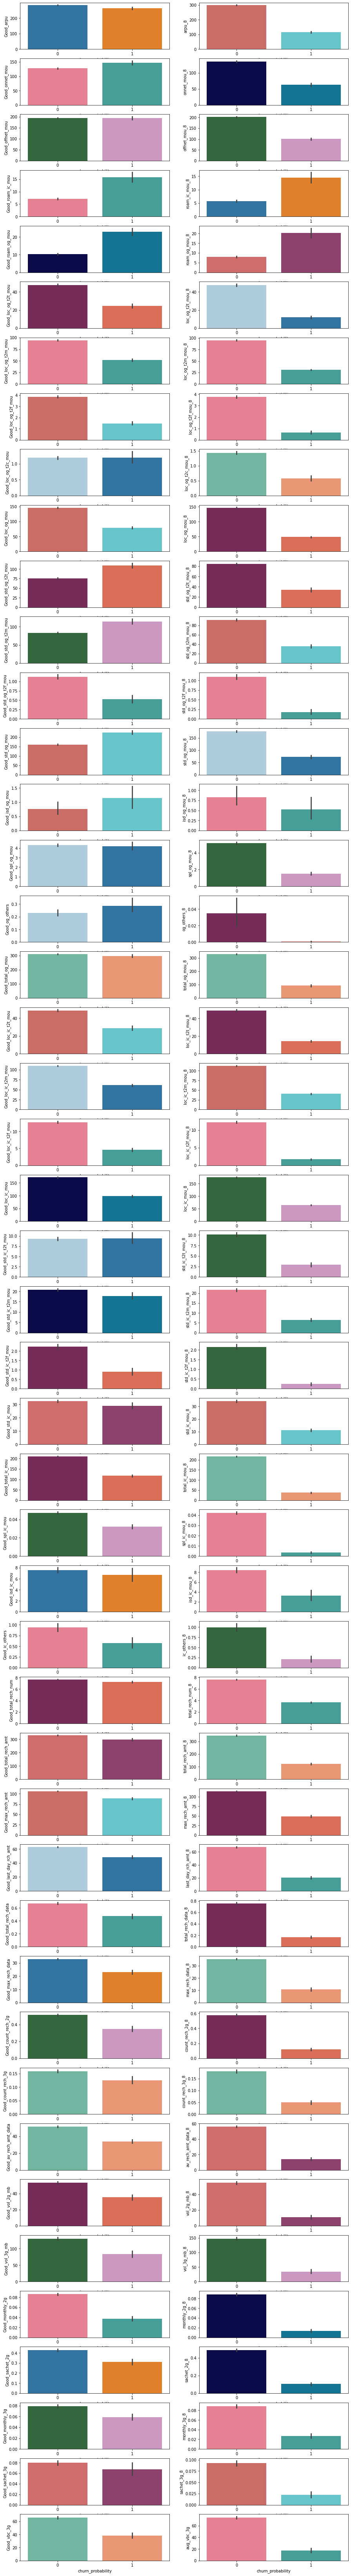

In [56]:
compare_cols= list(zip(cols_kpi_good, cols_kpi_8))
plt.figure(figsize=(15, 120))
r=1
pal=["tab10","hls","husl","Set2","Paired","flare","rocket","cubehelix","hls","husl",'ocean']
for c in compare_cols:
    plt.subplot(46, 2, r)
    sns.barplot(data=df_eda, y=c[0], x='churn_probability', palette=random.choice(pal))
    plt.subplot(46 , 2, r+1)
    sns.barplot(data=df_eda, y=c[1], x='churn_probability', palette=random.choice(pal))
    r=r+2
plt.show()

OBSERVATION: It is evident that most of the KPIs of the customers who are likely to churn in future is showing a decreasing trend in the 8th month as compared to Good months(6th & 7th). On the other hand, there is no such trend being observed for the customers who are not likey to churn. As a result, we can conclude that all the above KPIs are good indicators of churn according to EDA.

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

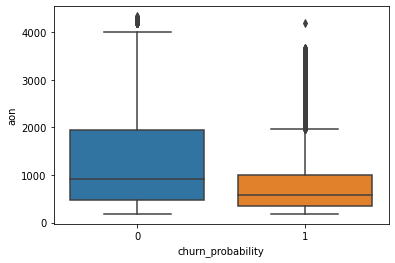

In [57]:
# Let us look at the aon - age of network feature
sns.boxplot(data = df_eda, x=df_eda.churn_probability, y=df_eda.aon)

OBSERVATION: Customers who are projected to churn have a lower age/duration on the network operator

In [58]:
#Let us bin the age on network column to further analyse it.
df_eda.aon.describe()

count    69999.000000
mean      1220.639709
std        952.426321
min        180.000000
25%        468.000000
50%        868.000000
75%       1813.000000
max       4337.000000
Name: aon, dtype: float64

In [59]:
def aon_binning(x):
    aon = x['aon']
    if aon <= 365:
        return '1 year or less'
    elif aon <= 730:
        return '1-2 years'
    elif aon <= 1095:
        return '2-3 years'
    elif aon<=1825:
        return '3-5years'
    else:
        return '5+ years'

df_eda['age_bin'] = df_eda.apply(aon_binning,axis=1)
df_test['age_bin'] = df_test.apply(aon_binning,axis=1)

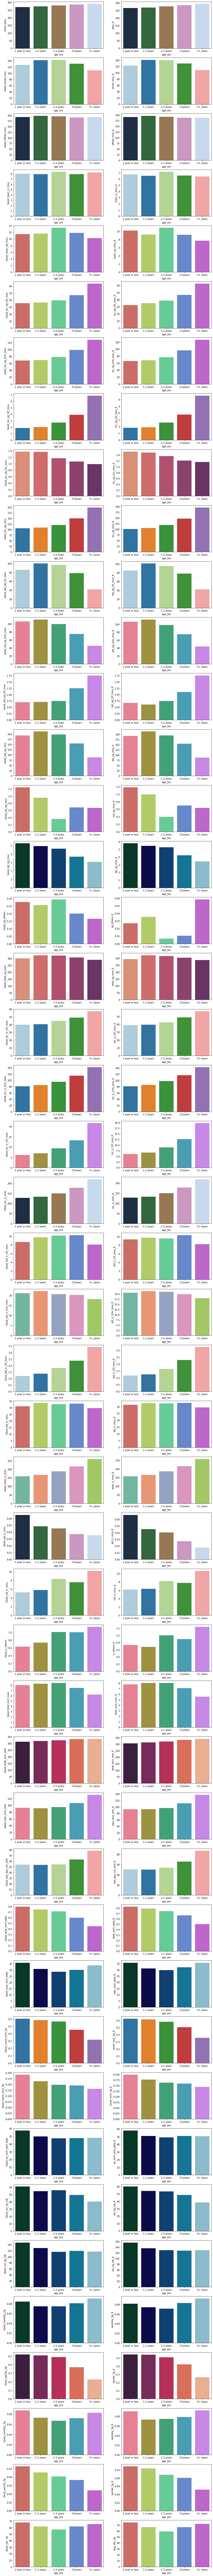

In [60]:
# Let us plot some of the KPI's against the age bin in order to get some insights
plt.figure(figsize=(15,200))
c=1
for i in range(0,len(cols_kpi_good)):
    df_temp = df_eda[[cols_kpi_good[i], cols_kpi_8[i], 'age_bin']]
    df_gb = df_temp.groupby(by= 'age_bin').mean()
    shade = random.choice(pal)
    plt.subplot(len(cols_kpi_good), 2, c)
    sns.barplot(data = df_gb, y = cols_kpi_good[i], x = df_gb.index, palette= shade)
    c = c + 1
    plt.subplot(len(cols_kpi_8), 2, c)
    sns.barplot(data = df_gb, y = cols_kpi_8[i], x = df_gb.index, palette=shade)
    c = c + 1
    
plt.show()

OBSERVATIONS:

Usage

1. Overall revenue increases as the age on network increases
2. Local outgoing voice calls within same telecom circle made by the user increases as the age on network increases
3. Local outgoing voice calls to other mobile telecom operator made by the user increases as the age on network increases
4. Local outgoing voice calls to other fixed telecom operator made by the user increases as the age on network increases significantly
5. Local outgoing voice calls to its own call center made by the user decreases as the age on network increases
6. Overall local outgoing voice calls made by the user increases as the age on network increases
7. STD outgoing calls to the same network or other mobile network show a decreasing trend after 1-2 years on the network
8. STD outgoing calls on fixed lines increases for users on network for more than 2-3 years
9. Overall STD outgoing calls show a decreasing trend after 1-2 years on the network
10. ISD outgoing and special outgoing calls also show a decreasing trend as the age on network increases
11. To some extent, more or less an increasing trend is seen in the incoming calls as the age on the network increases for the customer.

Recharges

1. Number of recharges remain similar for customers less than 3 years with the network then it decreases after 3 years
2. Amount of recharge shows a gradual increase with the increase in the age on network
3. Max. recharge amount is also higher when the age on the network increases.
4. From the above 3 points we can say that customers with low aon do more number of recharges with low values, but high aon   customers do high value recharges, but the number of recharges is low.
5. Data (both 2G an 3G) recharges (both count and amount) tend to decrease as aon increases both 2G and 3G
6. Data usage also shows a slightly decreasing trend with increase in aon.
7. But overall data arpu seem to increase which means that the older customers are doing data recharge, but the overall usage is lower compared to the newer customers.

<AxesSubplot:xlabel='churn_probability'>

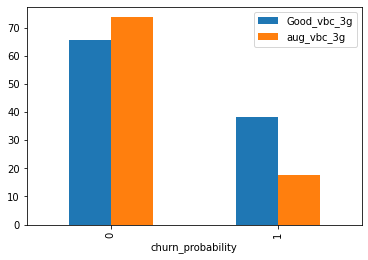

In [61]:
df_vbc_churn = df_eda[['Good_vbc_3g', 'aug_vbc_3g', 'churn_probability']]
piv = df_vbc_churn.pivot_table(index = 'churn_probability', values = ['Good_vbc_3g','aug_vbc_3g'], aggfunc='mean')
piv.plot(kind = 'bar')

OBSERVATION: There is a similar trend with vbc cusomters. The vbc cost goes down for churning customers whereas it goes up for non-churning customers.

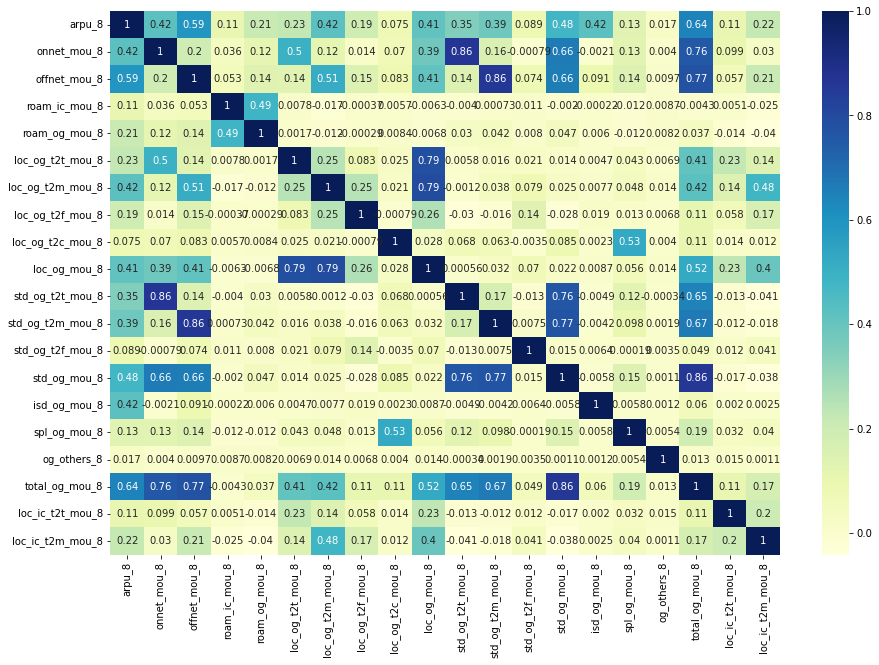

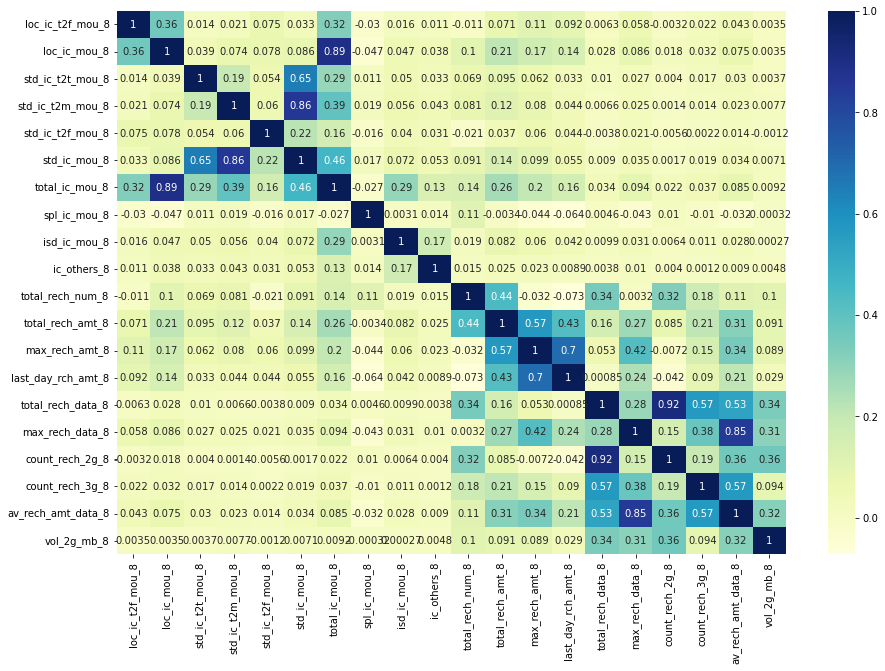

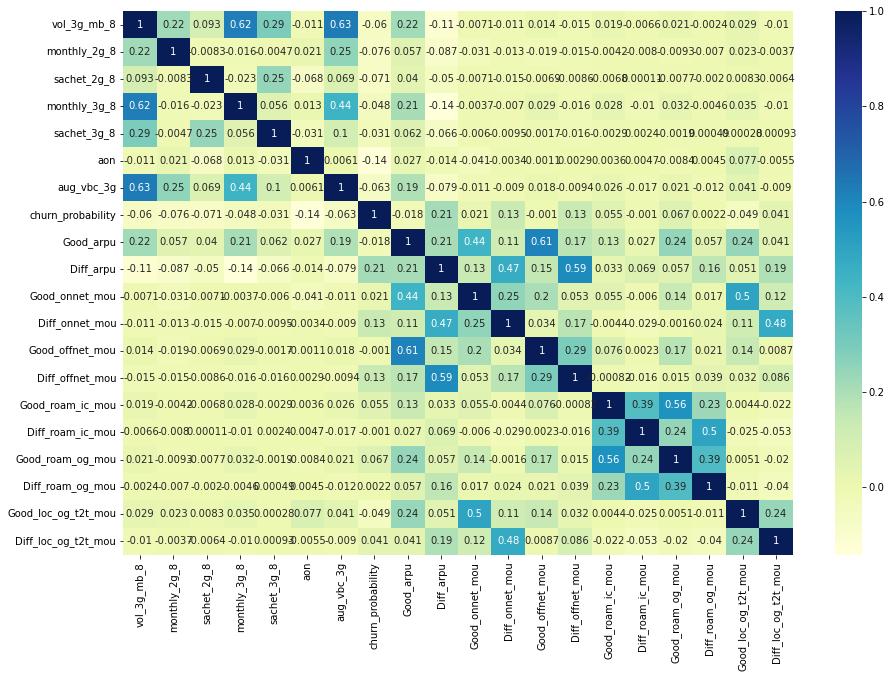

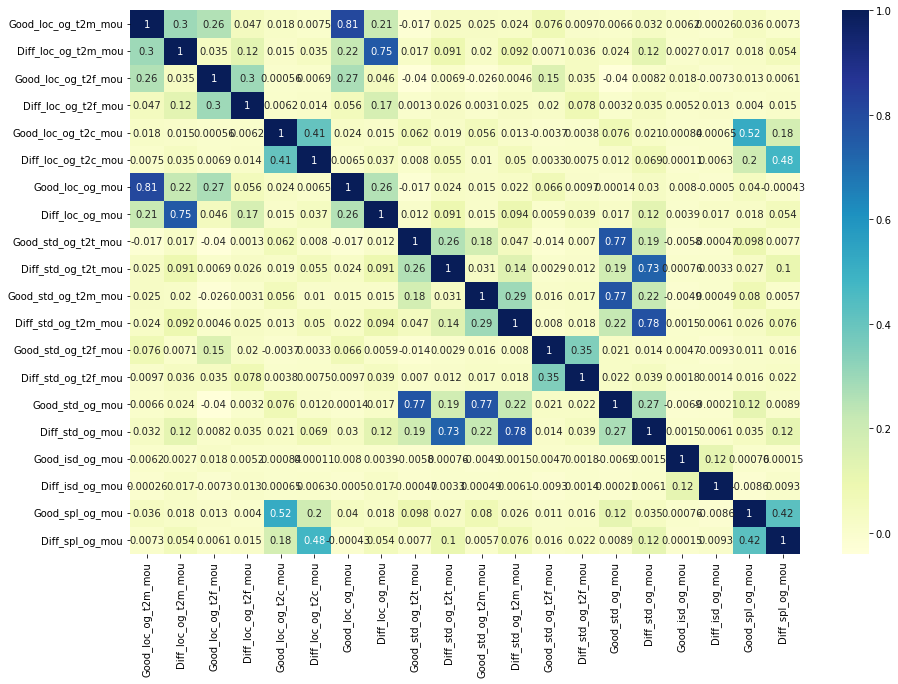

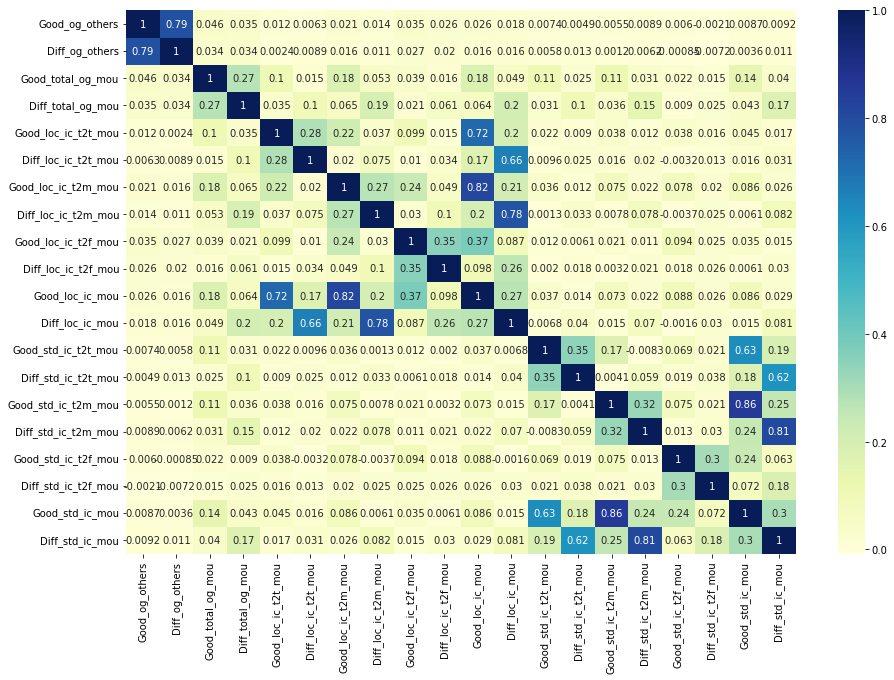

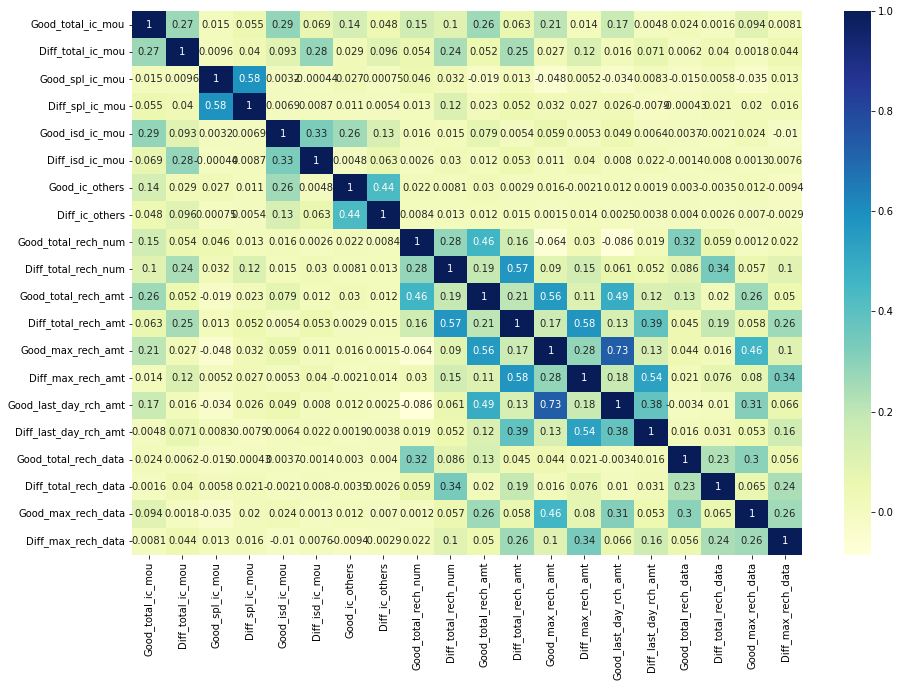

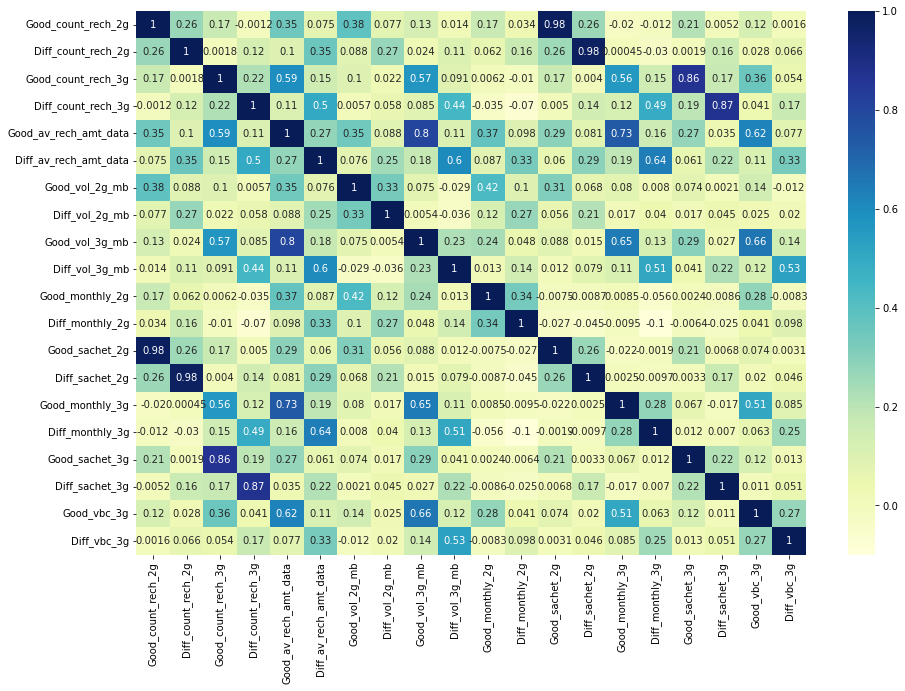

In [62]:
# Let us check the correlation among columns, and then drop some of the highly correlated features
for i in range(0, len(df_tel.columns), 20):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df_tel[df_tel.columns[i:i+20]].corr(), annot = True, cmap="YlGnBu")
    plt.show()

In [63]:
from collections import Counter 
corr_df_eda = df_eda.corr()
c = corr_df_eda.abs()

s = c.unstack()
so = s.sort_values(ascending=False)
so = pd.DataFrame(so, columns=['corr'])
high_corr = list(so[(so['corr']<1) & (so['corr']>0.8)].index)
corr_list=[]
for x in high_corr:
    corr_list.append(x[0])
    corr_list.append(x[1])
count = dict (Counter(corr_list))
count_df_eda = pd.DataFrame()
count_df_eda['Col'] = list(count.keys())
count_df_eda['Count'] = np.array(count.values())
count_df_eda.sort_values(by='Count', ascending=False)

Col Count
22           loc_ic_mou_8     6
18        Good_loc_ic_mou     6
0          Good_sachet_2g     4
12   Good_total_rech_data     4
56        Good_loc_og_mou     4
1      Good_count_rech_2g     4
16   Diff_total_rech_data     4
13      total_rech_data_8     4
32  Good_av_rech_amt_data     4
7          Diff_sachet_2g     4
6      Diff_count_rech_2g     4
3         count_rech_2g_8     4
2             sachet_2g_8     4
9        total_rech_amt_8     2
51        Good_std_og_mou     2
41    Diff_total_rech_amt     2
42              Diff_arpu     2
43       std_ic_t2m_mou_8     2
44           std_ic_mou_8     2
45         Good_onnet_mou     2
46    Good_std_og_t2t_mou     2
47        Diff_loc_ic_mou     2
48      Diff_total_ic_mou     2
49     av_rech_amt_data_8     2
50        max_rech_data_8     2
53        Good_offnet_mou     2
52      Good_total_og_mou     2
39        Good_std_ic_mou     2
54    Good_std_og_t2m_mou     2
55           loc_og_mou_8     2
57    Good_loc_ic_t2m_mou     2
58       loc_ic_t2m_mou_8     2
59    Diff_std_ic_t2m_mou     2
60        Diff_std_ic_mou     2
61    Good_loc_og_t2m_mou     2
62         Good_vol_3g_mb     2
63    Good_loc_og_t2t_mou     2
40    Good_std_ic_t2m_mou     2
37           offnet_mou_8     2
38       std_og_t2m_mou_8     2
10           isd_og_mou_8     2
11        Good_isd_og_mou     2
8                  arpu_8     2
14      Diff_total_og_mou     2
15        Diff_std_og_mou     2
17      Good_total_ic_mou     2
5     Good_total_rech_amt     2
19        Diff_offnet_mou     2
20    Diff_std_og_t2m_mou     2
21         total_ic_mou_8     2
4               Good_arpu     2
23    Diff_std_og_t2t_mou     2
24         Diff_onnet_mou     2
25            sachet_3g_8     2
26        count_rech_3g_8     2
27         Diff_sachet_3g     2
28     Diff_count_rech_3g     2
29         Good_sachet_3g     2
30     Good_count_rech_3g     2
31     Good_max_rech_data     2
33            onnet_mou_8     2
34       std_og_t2t_mou_8     2
35           std_og_mou_8     2
36         total_og_mou_8     2
64       loc_og_t2t_mou_8     2

In [64]:
# Let us remove highly correlated columns
cols_high_corr = list(count_df_eda[count_df_eda['Count']>2].Col)
cols_high_corr

['Good_sachet_2g',
 'Good_count_rech_2g',
 'sachet_2g_8',
 'count_rech_2g_8',
 'Diff_count_rech_2g',
 'Diff_sachet_2g',
 'Good_total_rech_data',
 'total_rech_data_8',
 'Diff_total_rech_data',
 'Good_loc_ic_mou',
 'loc_ic_mou_8',
 'Good_av_rech_amt_data',
 'Good_loc_og_mou']

In [65]:
df_eda = df_eda.drop(cols_high_corr, axis = 1)

In [66]:
df_eda.shape

(69999, 128)

In [67]:
df_test = df_test.drop(cols_high_corr, axis = 1)

In [68]:
df_test.shape

(30000, 127)

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


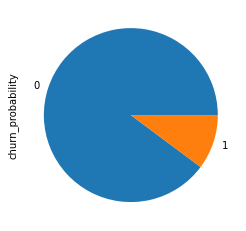

In [69]:
# let us find out churn/non churn percentage
print((df_eda['churn_probability'].value_counts()/len(df_eda))*100)
((df_eda['churn_probability'].value_counts()/len(df_eda))*100).plot(kind="pie")
plt.show()

OBSERVATION:

We need to apply a technique to resolve the class imbalance issue in the train dataset. The minority class i.e. churn is only about 10-15% of the overall data which will most probably result in a biased model if not addressed properly.

# Feature Engineering and Variable Transformation

In [70]:
X = df_eda.drop('churn_probability', axis=1)
y = df_eda.churn_probability
X = X.drop('age_bin', axis=1)

In [71]:
x_final = df_test.copy(deep=True)
y_final = pd.read_csv('solution.csv')
y_final = y_final['churn_probability']

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [73]:
x_final = x_final.drop('age_bin', axis=1)

In [74]:
# Let us standardize the data using scaling via StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)
x_final[x_final.columns] = scaler.transform(x_final)

In [75]:
x_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
7004   0.406429     1.931242     -0.193490      -0.125725      -0.142667   
22870 -0.563190    -0.388493     -0.311965      -0.125725      -0.142667   
52877 -0.111883    -0.257482      1.407535      -0.125725      -0.142667   
68764  0.708330     1.283766     -0.525403      -0.125725      -0.142667   
50048  0.236042    -0.269253     -0.167225      -0.125725      -0.142667   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
7004           4.322905          0.270618         -0.168767          -0.20976   
22870         -0.231580         -0.145821         -0.247171          -0.20976   
52877         -0.302928         -0.455575         -0.274889          -0.20976   
68764          3.241974         -0.426296         -0.274889          -0.20976   
50048         -0.025754          0.304340          0.014177          -0.20976   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
7004       2.822130         -0.155697         -0.325815          -0.13064   
22870     -0.250710         -0.303330         -0.307948          -0.13064   
52877     -0.491929         -0.111187          2.007831          -0.13064   
68764      1.710098         -0.303330         -0.325815          -0.13064   
50048      0.174678         -0.279915         -0.322097          -0.13064   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
7004      -0.318922     -0.026402     -0.279448    -0.014595        1.125611   
22870     -0.402650     -0.026402      0.939111    -0.014595       -0.423634   
52877      1.247419     -0.026402     -0.279448    -0.014595        0.804659   
68764     -0.414422     -0.026402     -0.279448    -0.014595        0.494161   
50048     -0.396827     -0.026402     -0.193543    -0.014595       -0.248573   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
7004           1.320600         -0.085539          0.042707         -0.181193   
22870         -0.138227         -0.235456         -0.287377         -0.181193   
52877         -0.310462         -0.556126         -0.283709         -0.181193   
68764         -0.078533         -0.573220         -0.292878         -0.181193   
50048         -0.262892         -0.406708         -0.271658         -0.181193   

       std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
7004          -0.238629         -0.121447     -0.287460        0.487294   
22870         -0.245594         -0.107564     -0.290215       -0.356090   
52877          0.379107         -0.121447      0.166241       -0.457138   
68764         -0.265551         -0.121447     -0.307233       -0.522148   
50048         -0.200456          0.117595     -0.220369       -0.484716   

       spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
7004       4.845647     -0.127824    -0.078421          0.385066   
22870     -0.258397     -0.127824    -0.078421         -0.867346   
52877     -0.258397     -0.127824    -0.078421          0.106753   
68764     -0.258397     -0.127347    -0.078421          0.941694   
50048     -0.258397     -0.127824    -0.052710          0.106753   

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  max_rech_data_8  \
7004           0.302812        0.181672           -0.616910        -0.123742   
22870         -0.586088       -0.339710            0.027591        -0.413242   
52877          0.334559        0.293970           -0.428518        -0.413242   
68764          0.631615        0.181672           -0.319448        -0.413242   
50048          0.227981        0.181672           -0.616910        -0.413242   

       count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  \
7004         -0.214093            0.130624    -0.235755    -0.233008   
22870        -0.214093           -0.388791    -0.235755    -0.233008   
52877        -0.214093           -0.388791    -0.235755    -0.233008   
68764

In [76]:
print(x_train.shape)
print(x_test.shape)

(52499, 126)
(17500, 126)


# Model Selection, Model Building, and  Prediction

We need to analyze the output from the following models, and we need to determine the feature importance using the one with the best possible results, and then we need to build that model with PCA in order to get the final churn prediction model.

    1. Logistic Regression
    2. Decision Trees
    3. Random Forest Classifier
    4. Gradient Boosting
    5. XGBoost

So, before we start building the model, let us address the imbalance issue in our dataset we discussed earlier.

### Logistic Regression Model

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [78]:
lr = LogisticRegression(class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15, step=15) # running RFE with 15 features as output
rfe = rfe.fit(x_train, y_train)

In [79]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 3),
 ('onnet_mou_8', False, 2),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_8', False, 7),
 ('roam_og_mou_8', False, 4),
 ('loc_og_t2t_mou_8', False, 3),
 ('loc_og_t2m_mou_8', False, 6),
 ('loc_og_t2f_mou_8', False, 9),
 ('loc_og_t2c_mou_8', False, 6),
 ('loc_og_mou_8', False, 4),
 ('std_og_t2t_mou_8', False, 6),
 ('std_og_t2m_mou_8', False, 2),
 ('std_og_t2f_mou_8', False, 7),
 ('std_og_mou_8', False, 4),
 ('isd_og_mou_8', False, 5),
 ('spl_og_mou_8', False, 7),
 ('og_others_8', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 4),
 ('std_ic_t2t_mou_8', False, 3),
 ('std_ic_t2m_mou_8', False, 3),
 ('std_ic_t2f_mou_8', False, 5),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', False, 2),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_8', False, 4),
 ('total_rech_num_8', False, 4),
 ('total_rech_amt_8', False, 3),
 ('max_rech_amt_8', False, 4),
 ('last_day_rch_amt_

In [80]:
col = x_train.columns[rfe.support_]
col

Index(['og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'Good_onnet_mou',
       'Good_offnet_mou', 'Good_total_og_mou', 'Good_loc_ic_t2t_mou',
       'Good_loc_ic_t2m_mou', 'Diff_loc_ic_mou', 'Good_total_ic_mou',
       'Diff_total_ic_mou'],
      dtype='object')

In [81]:
# Lets build the model with these 15 predicted variables from RFE
lr = lr.fit(x_train[col],y_train)

In [82]:
y_train_pred = lr.predict(x_train[col])
y_test_pred = lr.predict(x_test[col])
y_final_pred = lr.predict(x_final[col])

In [83]:
# Let us create a function to calculate all the desired metrics
from sklearn.metrics import roc_auc_score
def calc_metrics(y_train, y_train_pred, y_test, y_test_pred, y_final, y_final_pred):
    metrics = pd.DataFrame()
    name = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'Specificity', 'Sensitivity', 'ROC_AUC score']
    train = []
    train.append(accuracy_score(y_train, y_train_pred))
    train.append(precision_score(y_train, y_train_pred))
    train.append(recall_score(y_train, y_train_pred))
    train.append(f1_score(y_train, y_train_pred))
    x = confusion_matrix(y_train, y_train_pred)
    tn = x[0,0]
    fp = x[0,1]
    fn = x[1,0]
    tp = x[1,1]
    
    specificity = tn/(tn+fp)
    train.append(specificity)
    sensitivity = tp/(tp+fn)
    train.append(sensitivity)
    train.append(roc_auc_score(y_train, y_train_pred))
           
    test = []
    test.append(accuracy_score(y_test, y_test_pred))
    test.append(precision_score(y_test, y_test_pred))
    test.append(recall_score(y_test, y_test_pred))
    test.append(f1_score(y_test, y_test_pred))
    
    x = confusion_matrix(y_test, y_test_pred)
    tn = x[0,0]
    fp = x[0,1]
    fn = x[1,0]
    tp = x[1,1]
    
    specificity = tn/(tn+fp)
    test.append(specificity)
    sensitivity = tp/(tp+fn)
    test.append(sensitivity)
    test.append(roc_auc_score(y_test, y_test_pred))
    
    test_final = []
    test_final.append(accuracy_score(y_final, y_final_pred))
    test_final.append(precision_score(y_final, y_final_pred))
    test_final.append(recall_score(y_final, y_final_pred))
    test_final.append(f1_score(y_final, y_final_pred))
    
    x = confusion_matrix(y_final, y_final_pred)
    tn = x[0,0]
    fp = x[0,1]
    fn = x[1,0]
    tp = x[1,1]
    
    specificity = tn/(tn+fp)
    test_final.append(specificity)
    sensitivity = tp/(tp+fn)
    test_final.append(sensitivity)
    test_final.append(roc_auc_score(y_final, y_final_pred))
    
    metrics['Name'] = name
    metrics['Train'] = train
    metrics['Test'] = test
    metrics['Test Final'] = test_final
    
        
    return metrics

In [84]:
# Let us define a metric variable which contains all metrics related information
final_metrics = {'Metric Name':['Accuracy','Precision','Recall','F1','Specificity','Sensitivity','roc_auc']}

In [85]:
res = calc_metrics(y_train, y_train_pred, y_test, y_test_pred, y_final, y_final_pred)
final_metrics['Logistic_Regression'] = list(res['Test Final'])

In [86]:
confusion_matrix(y_final, y_final_pred)

array([[23565,  3376],
       [  569,  2490]], dtype=int64)

In [87]:
res

Name     Train      Test  Test Final
0   Accuracy Score  0.864645  0.866857    0.868500
1  Precision Score  0.416786  0.417611    0.424480
2     Recall Score  0.810207  0.815088    0.813992
3         F1 Score  0.550424  0.552267    0.557983
4      Specificity  0.870847  0.872657    0.874689
5      Sensitivity  0.810207  0.815088    0.813992
6    ROC_AUC score  0.840527  0.843872    0.844340

### Decision Trees 

In [88]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [89]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

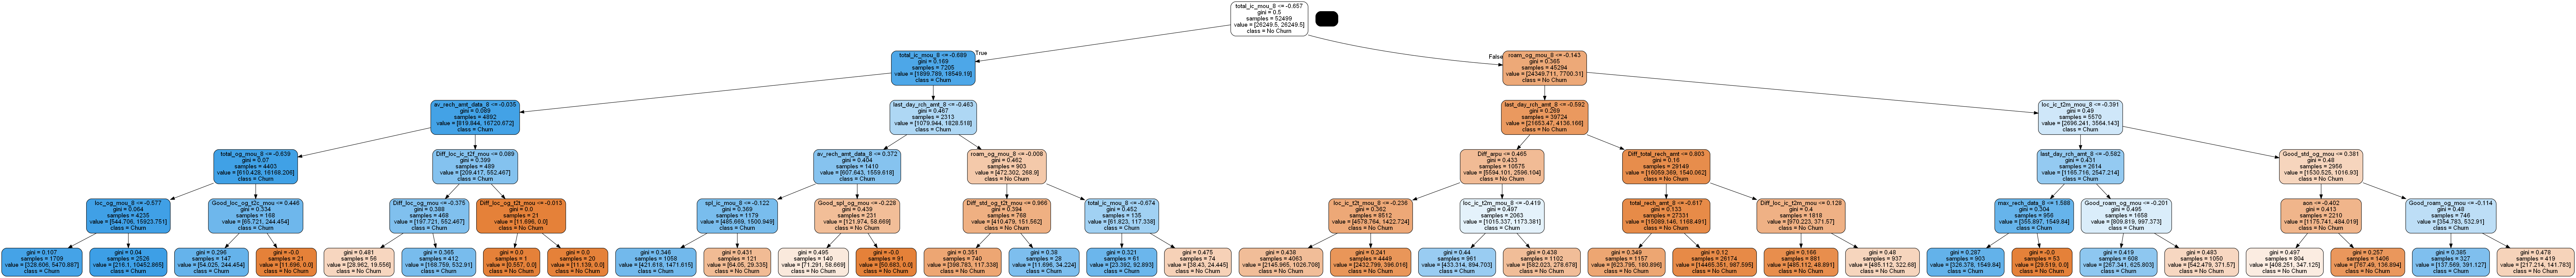

In [90]:
# Let us plot decision tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt,
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names=X.columns, 
                class_names=['No Churn', "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [91]:
y_train_pred = (dt.predict_proba(x_train)[:,1]>.5)
y_test_pred = (dt.predict_proba(x_test)[:,1]>.5)
y_final_pred = (dt.predict_proba(x_final)[:,1]>.5)

In [92]:
res = calc_metrics(y_train, y_train_pred, y_test, y_test_pred, y_final, y_final_pred)

In [93]:
final_metrics['Decision Tree'] = list(res['Test Final'])

In [94]:
confusion_matrix(y_final, y_final_pred)

array([[24407,  2534],
       [  575,  2484]], dtype=int64)

In [95]:
res

Name     Train      Test  Test Final
0   Accuracy Score  0.900817  0.896629    0.896367
1  Precision Score  0.509268  0.492042    0.495018
2     Recall Score  0.829018  0.806580    0.812030
3         F1 Score  0.630945  0.611219    0.615080
4      Specificity  0.908996  0.906717    0.905943
5      Sensitivity  0.829018  0.806580    0.812030
6    ROC_AUC score  0.869007  0.856648    0.858986

### Random Forest 

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [97]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=5, min_samples_leaf=10,
                            random_state=100, oob_score=True, min_samples_split=20,
                           verbose=1, n_jobs=-1, class_weight='balanced')

In [98]:
rf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.2s finished


RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=5,
                       min_samples_leaf=10, min_samples_split=20, n_jobs=-1,
                       oob_score=True, random_state=100, verbose=1)

In [99]:
rf.oob_score_

0.9317510809729709

In [100]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
y_final_pred = rf.predict(x_final)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


In [101]:
res = calc_metrics(y_train, y_train_pred, y_test, y_test_pred, y_final, y_final_pred)
res

Name     Train      Test  Test Final
0   Accuracy Score  0.956666  0.933657    0.935767
1  Precision Score  0.730414  0.653728    0.671204
2     Recall Score  0.913392  0.726035    0.725400
3         F1 Score  0.811719  0.687987    0.697251
4      Specificity  0.961596  0.956917    0.959653
5      Sensitivity  0.913392  0.726035    0.725400
6    ROC_AUC score  0.937494  0.841476    0.842527

OBSERVATION:
    
    It is clear that Random Forests are performing better than Logistic Regression. However, Precision and Recall Scores are still on the lower side. Some hyper parameter tuning is required.

In [102]:
# Let us do some hyper parameter tuning on Random Forests
params = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,100,200],
    'max_features': [5,10, 20]
}

In [103]:
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=5, 
                                   scoring='f1', n_jobs=-1, cv=3, verbose=10, 
                                   random_state=42)

In [104]:
gs = random_search.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.0s finished


In [105]:
gs.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 10,
 'max_features': 5,
 'max_depth': 20}

In [106]:
gs.best_score_

0.6866439982003332

In [107]:
rf_best = gs.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=5,
                       min_samples_leaf=10, min_samples_split=20, n_jobs=-1,
                       oob_score=True, random_state=100, verbose=1)

In [108]:
y_train_pred = rf_best.predict(x_train)
y_test_pred = rf_best.predict(x_test)
y_final_pred = rf_best.predict(x_final)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


In [109]:
res = calc_metrics(y_train, y_train_pred, y_test, y_test_pred, y_final, y_final_pred)

In [110]:
final_metrics['Random Forest'] = list(res['Test Final'])

In [111]:
pd.DataFrame(final_metrics)

Metric Name  Logistic_Regression  Decision Tree  Random Forest
0     Accuracy             0.868500       0.896367       0.935767
1    Precision             0.424480       0.495018       0.671204
2       Recall             0.813992       0.812030       0.725400
3           F1             0.557983       0.615080       0.697251
4  Specificity             0.874689       0.905943       0.959653
5  Sensitivity             0.813992       0.812030       0.725400
6      roc_auc             0.844340       0.858986       0.842527

### Gradient Boosting

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [113]:
# After counter
counter= Counter(y_train)
print(counter)

Counter({0: 47130, 1: 5369})


In [114]:
#Let us fix the class imbalance issue
import imblearn

#Before counter
counter= Counter(y_train)
print(counter)
x_train_b4_oversampling, y_train_b4_oversampling = x_train, y_train

os= imblearn.over_sampling.SMOTE(random_state=42)
x_train_GB, y_train_GB = os.fit_resample(x_train, y_train)

#After counter
counter= Counter(y_train_GB)
print(counter)

Counter({0: 47130, 1: 5369})
Counter({0: 47130, 1: 47130})


In [115]:
gb = GradientBoostingClassifier(random_state=100, learning_rate=.1, verbose = 2, max_features=10,
                                max_depth=20, n_estimators=100, max_leaf_nodes=20)
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 20,
 'max_features': 10,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 2,
 'warm_start': False}

In [116]:
gb.fit(x_train_GB, y_train_GB)

      Iter       Train Loss   Remaining Time 
         1           1.2779            2.00m
         2           1.1868            1.82m
         3           1.1066            1.56m
         4           1.0407            1.38m
         5           0.9821            1.25m
         6           0.9308            1.27m
         7           0.8895            1.20m
         8           0.8498            1.24m
         9           0.8181            1.21m
        10           0.7848            1.17m
        11           0.7546            1.14m
        12           0.7290            1.12m
        13           0.7091            1.10m
        14           0.6894            1.09m
        15           0.6694            1.09m
        16           0.6529            1.07m
        17           0.6413            1.04m
        18           0.6274            1.01m
        19           0.6139           58.94s
        20           0.6026           57.33s
        21           0.5909           55.78s
        2

GradientBoostingClassifier(max_depth=20, max_features=10, max_leaf_nodes=20,
                           random_state=100, verbose=2)

In [117]:
y_train_pred = gb.predict(x_train_GB)
y_test_pred = gb.predict(x_test)
y_final_pred = gb.predict(x_final)

In [118]:
res = calc_metrics(y_train_GB, y_train_pred, y_test, y_test_pred, y_final, y_final_pred)
res

Name     Train      Test  Test Final
0   Accuracy Score  0.939476  0.921543    0.917933
1  Precision Score  0.939355  0.585153    0.573540
2     Recall Score  0.939614  0.760068    0.761033
3         F1 Score  0.939484  0.661239    0.654116
4      Specificity  0.939338  0.939633    0.935748
5      Sensitivity  0.939614  0.760068    0.761033
6    ROC_AUC score  0.939476  0.849850    0.848391

In [119]:
#Let us try to do some hyper paramter tuning on Gradient Boost Model
params = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,100,150],
    'max_features': [5,10, 20],
    'learning_rate':[.05,.1,.2],
    'max_leaf_nodes':[10,20,30]
}

In [120]:
rs = RandomizedSearchCV(gb, param_distributions=params, n_iter=5,
                        scoring='accuracy', n_jobs=-1, cv=3, verbose=10, random_state=42)

In [121]:
rs.fit(x_train_GB, y_train_GB)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
      Iter       Train Loss   Remaining Time 
         1           1.3310            2.43m
         2           1.2792            2.39m
         3           1.2294            2.14m
         4           1.1845            2.15m
         5           1.1421            2.57m
         6           1.1036            2.86m
         7           1.0679            2.98m
         8           1.0356            3.21m
         9           1.0045            3.21m
        10           0.9769            3.15m
        11           0.9489            3.27m
        12           0.9231            3.34m
        13           0.8998            3.31m
        14           0.8783            3.28m
        15           0.8579            3.20m
        16           0.8393            3.12m
        17           0.8217            3.07m
        18           0.8043            3.14m
        19           0.7899            3.11m
        20           0.7744            

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(max_depth=20,
                                                        max_features=10,
                                                        max_leaf_nodes=20,
                                                        random_state=100,
                                                        verbose=2),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [10, 20, 30],
                                        'max_features': [5, 10, 20],
                                        'max_leaf_nodes': [10, 20, 30],
                                        'min_samples_leaf': [5, 10, 20],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy', verbose=10)

In [122]:
rs.best_score_

0.9293337576914916

In [123]:
gb_final = rs.best_estimator_

In [124]:
y_train_pred = gb_final.predict(x_train_GB)
y_test_pred = gb_final.predict(x_test)
y_final_pred = gb_final.predict(x_final)
res = calc_metrics(y_train_GB, y_train_pred, y_test, y_test_pred, y_final, y_final_pred)
res

Name     Train      Test  Test Final
0   Accuracy Score  0.936389  0.919543    0.917233
1  Precision Score  0.937149  0.575564    0.569971
2     Recall Score  0.935519  0.766875    0.766917
3         F1 Score  0.936333  0.657588    0.653937
4      Specificity  0.937259  0.936646    0.934301
5      Sensitivity  0.935519  0.766875    0.766917
6    ROC_AUC score  0.936389  0.851760    0.850609

In [125]:
final_metrics['Gradient Boosting'] = list(res['Test Final'])

In [126]:
pd.DataFrame(final_metrics)

Metric Name  Logistic_Regression  Decision Tree  Random Forest  \
0     Accuracy             0.868500       0.896367       0.935767   
1    Precision             0.424480       0.495018       0.671204   
2       Recall             0.813992       0.812030       0.725400   
3           F1             0.557983       0.615080       0.697251   
4  Specificity             0.874689       0.905943       0.959653   
5  Sensitivity             0.813992       0.812030       0.725400   
6      roc_auc             0.844340       0.858986       0.842527   

   Gradient Boosting  
0           0.917233  
1           0.569971  
2           0.766917  
3           0.653937  
4           0.934301  
5           0.766917  
6           0.850609

### XGBoost 

In [127]:
import xgboost as xgb

#Lets fix the class imbalance
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [128]:
xgb_clf = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic',max_depth=20,n_estimators=700,learning_rate=.1,
                            tree_method='hist',verbosity=1,gamma=1,min_child_weight=5,scale_pos_weight=50)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 1,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 20,
 'max_leaves': None,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 700,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 50,
 'subsample': None,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': 1}

In [129]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=700,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [130]:
y_train_pred = xgb_clf.predict(x_train_GB)
y_test_pred = xgb_clf.predict(x_test)
y_final_pred = xgb_clf.predict(x_final)
res = calc_metrics(y_train_GB, y_train_pred, y_test, y_test_pred, y_final, y_final_pred)
res

Name     Train      Test  Test Final
0   Accuracy Score  0.928379  0.935371    0.933333
1  Precision Score  0.986952  0.659114    0.650984
2     Recall Score  0.868237  0.742484    0.746322
3         F1 Score  0.923796  0.698320    0.695401
4      Specificity  0.988521  0.956980    0.954567
5      Sensitivity  0.868237  0.742484    0.746322
6    ROC_AUC score  0.928379  0.849732    0.850445

In [131]:
confusion_matrix(y_final, y_final_pred)

array([[25717,  1224],
       [  776,  2283]], dtype=int64)

In [132]:
# Let us perform hyper parameter tuning on XGBoost model
params = {
        'n_estimators' : [500,1000,1200],
        'learning_rate' : [0.05,0.1,.5],
        'min_child_weight': [5, 7, 10],
        'gamma': [0.1,0.5, 1],
        'max_depth': [5, 7, 10],
        'max_leaves': [3, 5, 8]
        }
folds = 3
param_comb = 10

In [133]:
random_search = RandomizedSearchCV(xgb_clf, param_distributions=params,
                                   n_iter=param_comb, scoring='accuracy',
                                   n_jobs=-1, cv=3, verbose=10, random_state=42)

In [134]:
rs = random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [135]:
rs.best_score_

0.8810452951052986

In [136]:
rs.best_params_

{'n_estimators': 500,
 'min_child_weight': 5,
 'max_leaves': 5,
 'max_depth': 10,
 'learning_rate': 0.5,
 'gamma': 0.5}

In [137]:
xg_best = rs.best_estimator_

In [138]:
y_train_pred = xg_best.predict(x_train)
y_test_pred = xg_best.predict(x_test)
y_final_pred = xg_best.predict(x_final)
res = calc_metrics(y_train, y_train_pred, y_test, y_test_pred, y_final, y_final_pred)
res

Name     Train      Test  Test Final
0   Accuracy Score  0.885084  0.859143    0.856900
1  Precision Score  0.470882  0.406649    0.406060
2     Recall Score  1.000000  0.867272    0.871854
3         F1 Score  0.640272  0.553685    0.554067
4      Specificity  0.871992  0.858232    0.855202
5      Sensitivity  1.000000  0.867272    0.871854
6    ROC_AUC score  0.935996  0.862752    0.863528

In [139]:
final_metrics['XGBoost'] = list(res['Test Final'])

In [140]:
final_results = pd.DataFrame(final_metrics)
final_results

Metric Name  Logistic_Regression  Decision Tree  Random Forest  \
0     Accuracy             0.868500       0.896367       0.935767   
1    Precision             0.424480       0.495018       0.671204   
2       Recall             0.813992       0.812030       0.725400   
3           F1             0.557983       0.615080       0.697251   
4  Specificity             0.874689       0.905943       0.959653   
5  Sensitivity             0.813992       0.812030       0.725400   
6      roc_auc             0.844340       0.858986       0.842527   

   Gradient Boosting   XGBoost  
0           0.917233  0.856900  
1           0.569971  0.406060  
2           0.766917  0.871854  
3           0.653937  0.554067  
4           0.934301  0.855202  
5           0.766917  0.871854  
6           0.850609  0.863528

In [141]:
confusion_matrix(y_final, y_final_pred)

array([[23040,  3901],
       [  392,  2667]], dtype=int64)

##### OBSERVATION: As per above metrics, Random Forest model gives us the optimal Churn prediction considering the fact that we have used Randomized Search instead of Grid Search which is faster in terms of computation but it comes with a tradeoff in terms of performance metrics.

In [142]:
#Let us now create a function to make kaggle submission
def Kaggle_submit(file, predict):
    out = pd.DataFrame()
    out['id'] = final_id
    out['churn_probability'] = predict
    out.to_csv(file + ".csv", index=False)
    return 'Done, File Created. : '+ file + '.csv'

In [143]:
Kaggle_submit("Submission", y_final_pred)

'Done, File Created. : Submission.csv'

<AxesSubplot:>

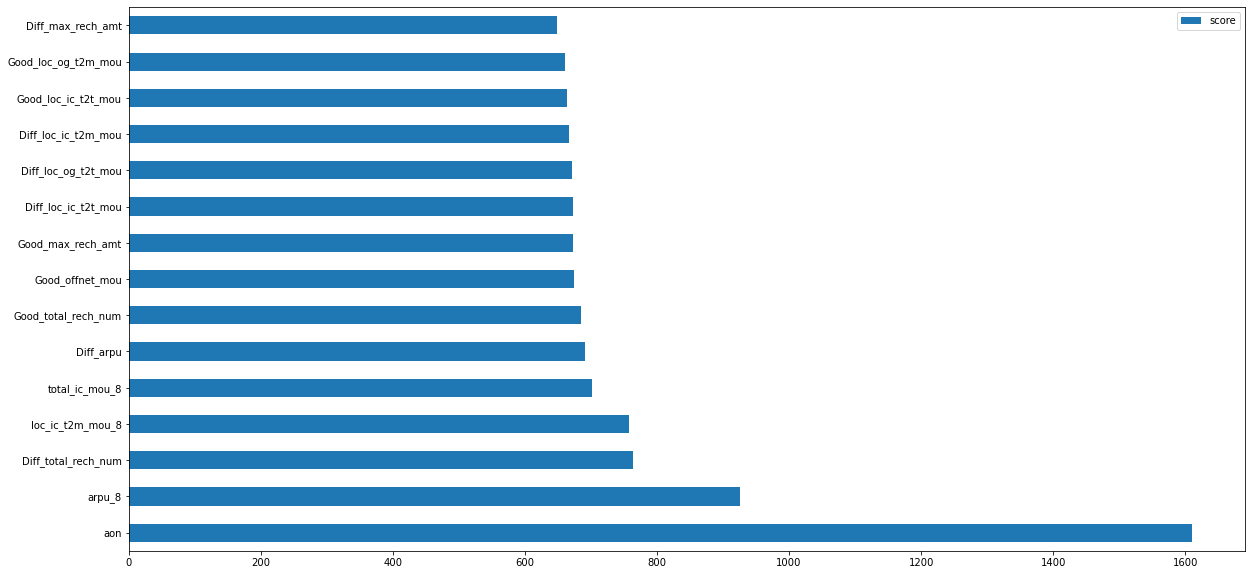

In [144]:
feature_important = xgb_clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(15, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 15 features

OBSERVATION:
    
    As per the above XGBoost model, the 15 most important features that impact the customer churn behaviour are as follows:
    
    aon : Age on network
    arpu_8 : Average revenue per user in the month of August
    Diff_total_rech_num : Differnce in the total recharge count for average of (6th and 7th month) and 8th month
    loc_ic_t2m_mou_8 : local incoming t to other network mobile minutes of usage in the 8th month
    total_ic_mou_8 : Total incoming minutes of usage in 8th month
    Diff_arpu : Difference in arpu between Good month's (average of 6th and 7th) and 8th month
    Good_total_rech_num : Average of total recharge count for 6th and 7th month
    Good_offnet_mou : Average of all calls outside the operator network for 6th and 7th month
    Good_max_rech_amt : Average of max recharge amount for 6th and 7th month
    Diff_loc_ic_t2t_mou : Difference in the local incoming calls within same mobile operator network for average of (6th and 7th month) and 8th month
    Diff_loc_og_t2t_mou : Difference in the local outgoing calls within same mobile operator network for average of (6th and 7th month) and 8th month
    Diff_loc_ic_t2m_mou : Difference in the local incoming calls to other mobile operator network for average of (6th and 7th month) and 8th month
    Good_loc_ic_t2t_mou : Average of local incoming calls within same mobile opertor network for 6th and 7th month
    Good_loc_og_t2m_mou : Average of local outgoing calls to other mobile operator network for average of (6th and 7th month) and 8th month
    Diff_max_rech_amt : Difference in the maximum recharge amount for average of (6th and 7th month) and 8th month

## Applying PCA on the Data

In [145]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit(x_train)

PCA(random_state=100)

In [146]:
x_train.shape

(52499, 126)

In [147]:
pca.explained_variance_ratio_

array([9.30111023e-02, 6.60174220e-02, 6.00537066e-02, 4.27645149e-02,
       3.55449006e-02, 3.21396964e-02, 2.75931252e-02, 2.67846510e-02,
       2.35993973e-02, 2.13535428e-02, 2.10038253e-02, 2.01298286e-02,
       1.93503262e-02, 1.85725665e-02, 1.83590473e-02, 1.73963728e-02,
       1.71449288e-02, 1.69461125e-02, 1.64351251e-02, 1.61063855e-02,
       1.58657886e-02, 1.53334502e-02, 1.48025653e-02, 1.45878716e-02,
       1.43175835e-02, 1.39586197e-02, 1.33474500e-02, 1.26202541e-02,
       1.21078462e-02, 1.18092952e-02, 1.12356266e-02, 1.07957344e-02,
       1.05804489e-02, 1.03464874e-02, 1.02560631e-02, 1.01099854e-02,
       9.83547520e-03, 9.56341835e-03, 9.21041977e-03, 9.09782105e-03,
       8.95289388e-03, 8.91646619e-03, 8.74162386e-03, 8.48254532e-03,
       8.28065128e-03, 8.11646177e-03, 7.78385209e-03, 7.23562453e-03,
       6.98717538e-03, 6.59364201e-03, 6.50276188e-03, 6.36593982e-03,
       6.21332348e-03, 5.79477835e-03, 5.49746417e-03, 5.42756436e-03,
      

In [148]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
# 60 as number of components results in 99% variance 
var_cumu[60]

0.9868110965861794

In [149]:
#Let us make the scree plot
import plotly.express as px
fig = px.line(df_eda, x=range(1, len(pca.explained_variance_ratio_)+1), y=var_cumu, title='Scree Plot')
fig.show()

In [150]:
# Let us get the reduced data
pca2 = PCA(n_components=60, random_state=100)
x_train_pca = pca2.fit_transform(x_train)

In [151]:
x_train_pca.shape

(52499, 60)

In [152]:
name=[]
for x in range (1,61):
    name.append("PC" + str(x))
df_eda = pd.DataFrame(x_train_pca, columns=name)
df_eda.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.355576 -0.365402 -1.481115  1.762685  0.748637 -2.390071  2.379711   
1 -2.168964 -0.394378 -0.129077  0.367751  0.260881 -0.653290 -0.203080   
2  0.681802  1.470353 -2.318596 -1.494981 -0.056867  0.443012 -0.812562   
3  1.165689 -2.536214 -1.538855 -0.211095  0.866556 -2.241156  1.036621   
4 -0.704550 -0.624481 -0.281865  0.417264  0.131483 -0.912427 -0.567678   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -2.550656 -2.540320  0.709729  0.932961  0.534697  0.249235  1.508992   
1  0.119877  0.225201 -0.307802  0.734052 -0.230235 -0.035310 -0.306505   
2  0.949045  1.569253 -1.207164 -0.596606 -1.111992 -0.610328  0.081646   
3 -1.551387 -1.910748  0.137836  2.232266  0.913209 -0.290499  1.070676   
4  0.497497  0.477055  0.498662  0.502620 -0.383910  0.419204 -0.357594   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.727259 -1.762157 -0.626696 -2.134417 -0.732669 -0.008752  1.728758   
1  0.651024 -0.235089  0.277264  0.171259  0.043422 -0.447904 -0.166417   
2 -0.743558 -0.251917 -0.180514  0.440672 -0.396520 -0.350156 -0.038723   
3 -0.729822 -1.729608 -0.700760 -2.352026 -0.250707  0.715030  1.440684   
4  0.313420  0.205825  0.082325 -0.296788 -0.005103  0.195213  0.360560   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  1.632286 -1.605836  3.442828 -0.380637 -0.182564 -0.236710  1.369002   
1  0.118638 -0.121095 -0.535900 -0.275375  0.958338 -0.020202  0.088891   
2  0.085714 -0.014189  0.099708  0.335537  0.382915  0.667951  0.996125   
3  0.983121 -1.001204  0.974820 -0.026460  1.405669 -1.121964  0.694658   
4  1.314123  0.375993  0.189603 -0.418651  0.718060 -0.390900 -0.139891   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  0.296371  1.692939  0.907105  0.290363 -0.496268 -0.476947  0.338661   
1 -0.127581 -0.250622 -0.422841 -0.248987  0.394197  0.278616 -0.267963   
2  0.109502  0.473233 -0.220261 -0.338256  0.053094 -0.240973 -0.003356   
3 -0.063479  1.835725  1.049955 -0.290241 -0.432923 -0.831178  0.242560   
4 -0.425779  0.031385 -1.231129  1.170416 -0.432497 -0.487277  0.341597   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.245320 -0.071770 -0.068297  2.422691 -0.258964 -1.817184  2.653693   
1 -0.027851 -0.053681  0.101596 -0.324034  0.246332  0.021349  0.088197   
2  0.070826 -0.310213  0.090033 -0.205582  0.597627  0.154596 -0.190854   
3 -0.187634 -0.338772  0.322245  0.326972  0.027549  0.120745 -0.530232   
4  0.278374  0.156054 -0.401963  0.394579  0.363930  0.665538 -0.361182   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -1.325964 -1.220801  0.713837 -0.631121  0.299112 -0.253178 -0.504487   
1  0.052909  0.019136  0.012778 -0.204132  0.159493 -0.120164 -0.145127   
2  0.020474  0.116720 -0.061681 -0.161229  0.079548 -0.170900 -0.006693   
3  0.155405  0.086548  0.172887 -0.114878 -0.615260  0.692456  0.479250   
4 -0.076155  0.135032 -0.617584  1.722691 -0.023025  0.447840 -0.115828   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  2.928441 -0.241484 -0.551490  0.584874 -0.530674 -0.678157 -0.003731   
1  1.056722 -0.861886 -0.806428 -0.556935  0.125588  0.076031  0.376112   
2  0.218733  0.580536  0.243621 -0.176704  0.780382 -0.521136 -0.431988   
3  0.516380  0.636966  0.520174 -0.406595 -1.554285 -1.232997 -0.223385   
4  0.595299 -0.079523  0.131710 -0.260669  0.051712 -1.061307 -0.373250   

       PC57      PC58      PC59      PC60  
0  0.271786  0.151047  0.013898  0.002019  
1  1.020398 -0.040819  0.114157 -0.017766  
2  0.161095 -0.097551  0.130344 -0.042171  
3 -0.150206  0.485311  0.037534 -0.380699  
4  0.100324  0.197347  0.134552 -0.266410

In [153]:
x_test_pca = pca2.transform(x_test)
x_test_pca.shape

(17500, 60)

In [154]:
x_final_test_pca = pca2.transform(x_final)
x_final_test_pca.shape
x_final_pca = x_final_test_pca
x_final_pca.shape

(30000, 60)

#### Building a Random Forest Model on PCA

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [156]:
rf_pca = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=10, min_samples_leaf=10, random_state=100, oob_score=True,min_samples_split=20,
                           class_weight='balanced')

In [157]:
rf_pca.fit(x_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=10,
                       min_samples_leaf=10, min_samples_split=20,
                       oob_score=True, random_state=100)

In [158]:
rf_pca.oob_score_

0.9110078287205471

In [159]:
y_train_pred_pca = rf_pca.predict(x_train_pca)
y_test_pred_pca = rf_pca.predict(x_test_pca)
y_final_pred_pca = rf_pca.predict(x_final_pca)

In [160]:
res = calc_metrics(y_train, y_train_pred_pca, y_test, y_test_pred_pca, y_final, y_final_pred_pca)
res

Name     Train      Test  Test Final
0   Accuracy Score  0.954456  0.915943    0.914933
1  Precision Score  0.710251  0.571012    0.570397
2     Recall Score  0.936860  0.665910    0.671461
3         F1 Score  0.807967  0.614821    0.616817
4      Specificity  0.956461  0.943954    0.942578
5      Sensitivity  0.936860  0.665910    0.671461
6    ROC_AUC score  0.946660  0.804932    0.807020

In [161]:
params = {
    'max_depth': [20,30],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,100,200],
    'max_features': [10, 20]
}

In [162]:
grid_search = GridSearchCV(estimator=rf_pca,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=10, scoring="accuracy")

In [163]:
#gs = grid_search.fit(x_train_pca, y_train)

In [164]:
#Hyper parameter tuning
# Let us do some hyper parameter tuning on Random Forests
params = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,100,200],
    'max_features': [5,10, 20]
}

In [165]:
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=5, 
                                   scoring='f1', n_jobs=-1, cv=3, verbose=10, 
                                   random_state=42)

In [166]:
gs = random_search.fit(x_train_pca, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


In [167]:
gs.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 10,
 'max_features': 5,
 'max_depth': 20}

In [168]:
gs.best_score_

0.5899752073746183

In [169]:
rf_pca_best = gs.best_estimator_
rf_pca_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=5,
                       min_samples_leaf=10, min_samples_split=20, n_jobs=-1,
                       oob_score=True, random_state=100, verbose=1)

In [170]:
y_train_pred_pca = rf_pca_best.predict(x_train_pca)
y_test_pred_pca = rf_pca_best.predict(x_test_pca)
y_final_pred_pca=rf_pca_best.predict(x_final_pca)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [171]:
res = calc_metrics(y_train, y_train_pred_pca, y_test, y_test_pred_pca, y_final, y_final_pred_pca)

In [172]:
final_metrics['Random Forest PCA'] = list(res['Test Final'])

In [173]:
pd.DataFrame(final_metrics)

Metric Name  Logistic_Regression  Decision Tree  Random Forest  \
0     Accuracy             0.868500       0.896367       0.935767   
1    Precision             0.424480       0.495018       0.671204   
2       Recall             0.813992       0.812030       0.725400   
3           F1             0.557983       0.615080       0.697251   
4  Specificity             0.874689       0.905943       0.959653   
5  Sensitivity             0.813992       0.812030       0.725400   
6      roc_auc             0.844340       0.858986       0.842527   

   Gradient Boosting   XGBoost  Random Forest PCA  
0           0.917233  0.856900           0.915933  
1           0.569971  0.406060           0.578578  
2           0.766917  0.871854           0.646290  
3           0.653937  0.554067           0.610562  
4           0.934301  0.855202           0.946550  
5           0.766917  0.871854           0.646290  
6           0.850609  0.863528           0.796420

#### Building XGBoost model with PCA

In [174]:
xgb_pca = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic', max_depth=10, n_estimators=2000, 
                            learning_rate=.5, tree_method='hist',
                            verbosity=1, gamma=5, min_child_weight=5, scale_pos_weight=50)
xgb_pca.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 5,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.5,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 2000,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 50,
 'subsample': None,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': 1}

In [175]:
xgb_pca.fit(x_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [176]:
threshold = .5
y_train_pca_pred = (xgb_pca.predict_proba(x_train_pca)[:,1] > threshold)
y_test_pca_pred = (xgb_pca.predict_proba(x_test_pca)[:,1] > threshold)
y_final_pca_pred = (xgb_pca.predict_proba(x_final_pca)[:,1] > threshold)

calc_metrics(y_train, y_train_pca_pred, y_test, y_test_pca_pred, y_final, y_final_pca_pred)

Name     Train      Test  Test Final
0   Accuracy Score  0.972438  0.895657    0.897367
1  Precision Score  0.787705  0.487314    0.497646
2     Recall Score  1.000000  0.686330    0.691076
3         F1 Score  0.881247  0.569948    0.578623
4      Specificity  0.969298  0.919108    0.920790
5      Sensitivity  1.000000  0.686330    0.691076
6    ROC_AUC score  0.984649  0.802719    0.805933

In [177]:
confusion_matrix(y_final, y_final_pca_pred)

array([[24807,  2134],
       [  945,  2114]], dtype=int64)

In [178]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

xgb_pca = xgb.XGBClassifier(n_jobs = -1,
                            objective = 'binary:logistic',
                            max_depth=10,
                            n_estimators=2000,
                            learning_rate=.5,
                            tree_method='hist',
                            verbosity=1,
                            gamma=1,
                            min_child_weight=5,
                            scale_pos_weight=50)
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

params = {'max_depth':[3,5,7,10], 
          'n_estimators':[1000,1500,1800,2000], 
          'learning_rate':[0.1,0.5],
          'gamma':[.1,.5,1,5,10],
          'scale_pos_weight':[10,20,50]}

classifier_xg = xgb_pca

random_search = RandomizedSearchCV(classifier_xg, 
                    param_distributions=params,
                    n_iter=param_comb,
                    random_state=100,
                    scoring='f1', 
                    n_jobs=-1, 
                    cv=skf.split(x_train_pca,y_train), 
                    verbose=10)

rs = random_search.fit(x_train_pca,y_train)
clf = random_search.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [179]:
rs.best_score_

0.6170106643869577

In [180]:
rs.best_params_

{'scale_pos_weight': 50,
 'n_estimators': 1500,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [181]:
y_train_pca_pred = clf.predict(x_train_pca)
y_test_pca_pred = clf.predict(x_test_pca)
y_final_pca_pred = clf.predict(x_final_pca)

res = calc_metrics(y_train, y_train_pca_pred, y_test, y_test_pca_pred, y_final, y_final_pca_pred)
res

Name     Train      Test  Test Final
0   Accuracy Score  0.999962  0.924743    0.925200
1  Precision Score  0.999628  0.620933    0.628185
2     Recall Score  1.000000  0.649461    0.652828
3         F1 Score  0.999814  0.634877    0.640269
4      Specificity  0.999958  0.955582    0.956126
5      Sensitivity  1.000000  0.649461    0.652828
6    ROC_AUC score  0.999979  0.802522    0.804477

In [182]:
confusion_matrix(y_final, y_final_pca_pred)

array([[25759,  1182],
       [ 1062,  1997]], dtype=int64)

In [183]:
final_metrics['XGBoost_PCA'] = list(res['Test Final'])

In [184]:
pd.DataFrame(final_metrics)

Metric Name  Logistic_Regression  Decision Tree  Random Forest  \
0     Accuracy             0.868500       0.896367       0.935767   
1    Precision             0.424480       0.495018       0.671204   
2       Recall             0.813992       0.812030       0.725400   
3           F1             0.557983       0.615080       0.697251   
4  Specificity             0.874689       0.905943       0.959653   
5  Sensitivity             0.813992       0.812030       0.725400   
6      roc_auc             0.844340       0.858986       0.842527   

   Gradient Boosting   XGBoost  Random Forest PCA  XGBoost_PCA  
0           0.917233  0.856900           0.915933     0.925200  
1           0.569971  0.406060           0.578578     0.628185  
2           0.766917  0.871854           0.646290     0.652828  
3           0.653937  0.554067           0.610562     0.640269  
4           0.934301  0.855202           0.946550     0.956126  
5           0.766917  0.871854           0.646290     0.652828  
6           0.850609  0.863528           0.796420     0.804477

Now, let us try to find features that impact the high value customers.

We can get the High Value customers from this data set.However, since there is no definition of high value customers given in the problem description, we assume a definition around average total recharge amount in the 6th and 7th month and consider the customers above 75 precentile as high value customers.

In [185]:
# Let us filter the data set for high value customers.
highvalue_cutoff = df_tel['Good_total_rech_amt'].quantile(.75)
highvalue_cutoff

419.75

In [186]:
df_highval_cust = df_tel[df_tel['Good_total_rech_amt'] >= highvalue_cutoff]

In [187]:
df_highval_cust.shape

(17500, 140)

In [188]:
X_hv = df_highval_cust.drop('churn_probability', axis=1)
y_hv = df_highval_cust['churn_probability']
from sklearn.model_selection import train_test_split
x_train_hv, x_test_hv, y_train_hv, y_test_hv = train_test_split(X_hv, y_hv, test_size=0.25, random_state=100)

In [189]:
#Let us scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_hv[x_train_hv.columns] = scaler.fit_transform(x_train_hv)
x_test_hv[x_test_hv.columns] = scaler.transform(x_test_hv)

Now, let us try to build a model for high value/profitable customers using the XGBoost which turned out to be the best for all the customers in our case.

In [190]:
xgb_hv = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic',max_depth=20,n_estimators=700,learning_rate=.1,
                            tree_method='hist',verbosity=1,gamma=1,min_child_weight=5,scale_pos_weight=50)
xgb_hv.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 1,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 20,
 'max_leaves': None,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 700,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 50,
 'subsample': None,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': 1}

In [191]:
xgb_hv.fit(x_train_hv, y_train_hv)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=700,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [192]:
y_train_hv_pred = xgb_hv.predict(x_train_hv)
y_test_hv_pred = xgb_hv.predict(x_test_hv)

<AxesSubplot:>

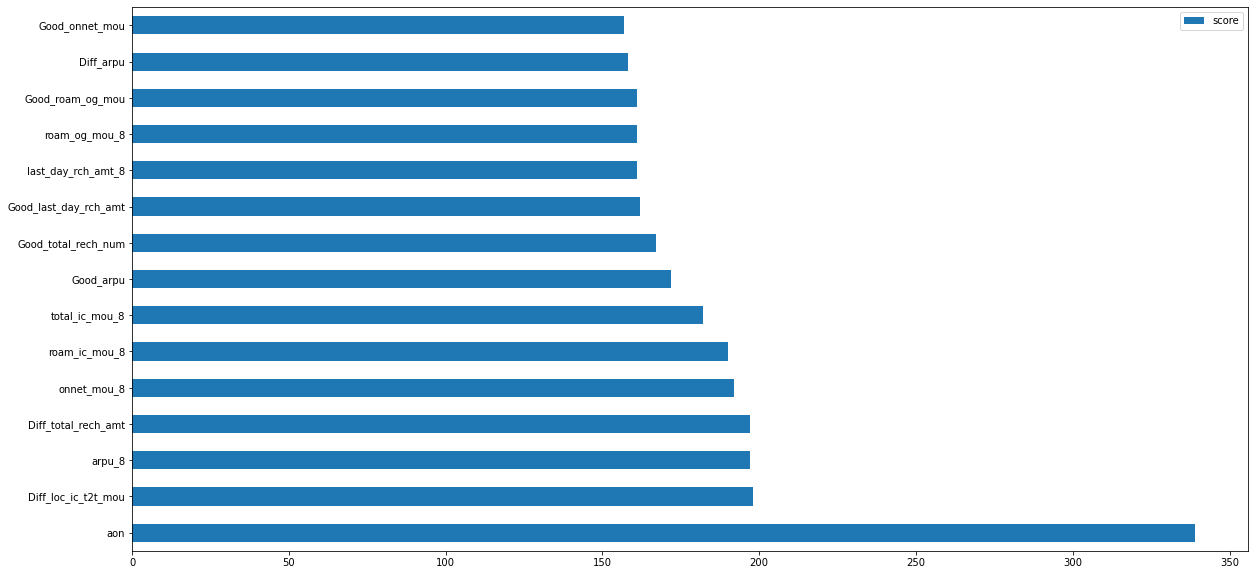

In [193]:
feature_important = xgb_hv.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(15, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 15 features

OBSERVATION:
    
    As per the above model, the 15 most important features that impact the customer churn behaviour are as follows:
    
    aon : Age on network
    Diff_loc_ic_t2t_mou : Difference in the local incoming calls within same mobile operator network for average of (6th and 7th month) and 8th month
    arpu_8 : Average revenue per user in the month of August
    Diff_total_rech_amt : Differnce in the total recharge amount for average of (6th and 7th month) and 8th month
    onnet_mou_8
    roam_ic_mou_8
    total_ic_mou_8 : Total incoming minutes of usage in 8th month
    Good_arpu
    Good_total_rech_num : Average of total recharge count for 6th and 7th month
    Good_last_day_rech_amt
    last_day_rech_amt_8
    roam_og_mou_8
    Good_roam_og_mou
    Diff_arpu
    Good_onnet_mou

In [194]:
pd.DataFrame(final_metrics)

Metric Name  Logistic_Regression  Decision Tree  Random Forest  \
0     Accuracy             0.868500       0.896367       0.935767   
1    Precision             0.424480       0.495018       0.671204   
2       Recall             0.813992       0.812030       0.725400   
3           F1             0.557983       0.615080       0.697251   
4  Specificity             0.874689       0.905943       0.959653   
5  Sensitivity             0.813992       0.812030       0.725400   
6      roc_auc             0.844340       0.858986       0.842527   

   Gradient Boosting   XGBoost  Random Forest PCA  XGBoost_PCA  
0           0.917233  0.856900           0.915933     0.925200  
1           0.569971  0.406060           0.578578     0.628185  
2           0.766917  0.871854           0.646290     0.652828  
3           0.653937  0.554067           0.610562     0.640269  
4           0.934301  0.855202           0.946550     0.956126  
5           0.766917  0.871854           0.646290     0.652828  
6           0.850609  0.863528           0.796420     0.804477

FINAL OBSERVATION: The best performing model is the random forest and xgboost and that will be our final model for our decent accuracy and highest churn detection even if has lesser accuracy